In [8]:
import os
from PIL import Image
import numpy as np

In [9]:
def binaryzation(data):                 #(1,28,28)
    row = data.shape[1]                 #28
    col = data.shape[2]                 #28
    ret = np.empty(row * col)           #(784,)
    for i in range(row):                #0-255，小于为0，大于为1
        for j in range(col):
            ret[i * col + j] = 0
            if(data[0][i][j] > 127):
                ret[i * col + j] = 1
    return ret

In [10]:
def load_data(data_path, split):
    files = os.listdir(data_path)                                           #列出目录下文件
    file_num = len(files)                                                   #文件数量
    idx = np.random.permutation(file_num)                                   #依旧是随机数
    selected_file_num = file_num                                               
    selected_files = []
    for i in range(selected_file_num):
        selected_files.append(files[idx[i]])                                #新的图
 
    img_mat = np.empty((selected_file_num, 1, 28, 28), dtype = "float32")   #生成一堆随机的数组shape=(图片数量, 1, 28, 28)
 
    data = np.empty((selected_file_num, 28 * 28), dtype = "float32")        #生成一堆随机的数组shape=(图片数量, 784)图片那784个像素
    label = np.empty((selected_file_num), dtype = "uint8")                  #生成一堆随机的数组shape=(图片数量,)每个图的label
 
    print("loading data...")
    for i in range(selected_file_num):
        print(i+1,"/",selected_file_num,"\r",)
        file_name = selected_files[i]
        file_path = os.path.join(data_path, file_name)
        img_mat[i] = Image.open(file_path)
        data[i] = binaryzation(img_mat[i])
        label[i] = int(file_name.split('.')[0])                             #label，详情见文件名格式(lebel.num.jpg)
    print("")
 
    div_line = (int)(split * selected_file_num)
    idx = np.random.permutation(selected_file_num)
    train_idx, test_idx = idx[:div_line], idx[div_line:]                    #分组
    train_data, test_data = data[train_idx], data[test_idx]
    train_label, test_label = label[train_idx], label[test_idx]

    return train_data, train_label, test_data, test_label

In [11]:
def KNN(test_vec, train_data, train_label, k):
    train_data_size = train_data.shape[0]                           #数据量，这里为42000的70%
    dif_mat = np.tile(test_vec, (train_data_size, 1)) - train_data  #将图片数组变为784列29399行的矩阵（对应train_data）然后互剪算出dif_mat
    sqr_dif_mat = dif_mat ** 2                                      #平方
    sqr_dis = sqr_dif_mat.sum(axis = 1)                             #计算选定图片于所有diff的和，axis=1就是将一个矩阵的每一行向量相加

    sorted_idx = sqr_dis.argsort()                                  #返回数组值从小到大的索引值

    class_cnt = {}
    maxx = 0
    best_class = 0
    for i in range(k):
        tmp_class = train_label[sorted_idx[i]]                      #距离最小的train_label的label
        tmp_cnt = class_cnt.get(tmp_class, 0) + 1                   #上面那个label的判断次数
        class_cnt[tmp_class] = tmp_cnt                              #给这个字典里这个label计数
        if(tmp_cnt > maxx):                                         #记录次数最高的label
            maxx = tmp_cnt
            best_class = tmp_class
    return best_class

In [12]:
#np.random.seed(123456)                                                         #随机数种子
train_data, train_label, test_data, test_label = load_data("MNIST_data", 0.7)  #载入数据，70%作为训练，30%测试

loading data...
0 / 42000 
1 / 42000 
2 / 42000 
3 / 42000 
4 / 42000 
5 / 42000 
6 / 42000 
7 / 42000 
8 / 42000 
9 / 42000 
10 / 42000 
11 / 42000 
12 / 42000 
13 / 42000 
14 / 42000 
15 / 42000 
16 / 42000 
17 / 42000 
18 / 42000 
19 / 42000 
20 / 42000 
21 / 42000 
22 / 42000 
23 / 42000 
24 / 42000 
25 / 42000 
26 / 42000 
27 / 42000 
28 / 42000 
29 / 42000 
30 / 42000 
31 / 42000 
32 / 42000 
33 / 42000 
34 / 42000 
35 / 42000 
36 / 42000 
37 / 42000 
38 / 42000 
39 / 42000 
40 / 42000 
41 / 42000 
42 / 42000 
43 / 42000 
44 / 42000 
45 / 42000 
46 / 42000 
47 / 42000 
48 / 42000 
49 / 42000 
50 / 42000 
51 / 42000 
52 / 42000 
53 / 42000 
54 / 42000 
55 / 42000 
56 / 42000 
57 / 42000 
58 / 42000 
59 / 42000 
60 / 42000 
61 / 42000 
62 / 42000 
63 / 42000 
64 / 42000 
65 / 42000 
66 / 42000 
67 / 42000 
68 / 42000 
69 / 42000 
70 / 42000 
71 / 42000 
72 / 42000 
73 / 42000 
74 / 42000 
75 / 42000 
76 / 42000 
77 / 42000 
78 / 42000 
79 / 42000 
80 / 42000 
81 / 42000 
82 / 42000

661 / 42000 
662 / 42000 
663 / 42000 
664 / 42000 
665 / 42000 
666 / 42000 
667 / 42000 
668 / 42000 
669 / 42000 
670 / 42000 
671 / 42000 
672 / 42000 
673 / 42000 
674 / 42000 
675 / 42000 
676 / 42000 
677 / 42000 
678 / 42000 
679 / 42000 
680 / 42000 
681 / 42000 
682 / 42000 
683 / 42000 
684 / 42000 
685 / 42000 
686 / 42000 
687 / 42000 
688 / 42000 
689 / 42000 
690 / 42000 
691 / 42000 
692 / 42000 
693 / 42000 
694 / 42000 
695 / 42000 
696 / 42000 
697 / 42000 
698 / 42000 
699 / 42000 
700 / 42000 
701 / 42000 
702 / 42000 
703 / 42000 
704 / 42000 
705 / 42000 
706 / 42000 
707 / 42000 
708 / 42000 
709 / 42000 
710 / 42000 
711 / 42000 
712 / 42000 
713 / 42000 
714 / 42000 
715 / 42000 
716 / 42000 
717 / 42000 
718 / 42000 
719 / 42000 
720 / 42000 
721 / 42000 
722 / 42000 
723 / 42000 
724 / 42000 
725 / 42000 
726 / 42000 
727 / 42000 
728 / 42000 
729 / 42000 
730 / 42000 
731 / 42000 
732 / 42000 
733 / 42000 
734 / 42000 
735 / 42000 
736 / 42000 
737 / 42000 

1285 / 42000 
1286 / 42000 
1287 / 42000 
1288 / 42000 
1289 / 42000 
1290 / 42000 
1291 / 42000 
1292 / 42000 
1293 / 42000 
1294 / 42000 
1295 / 42000 
1296 / 42000 
1297 / 42000 
1298 / 42000 
1299 / 42000 
1300 / 42000 
1301 / 42000 
1302 / 42000 
1303 / 42000 
1304 / 42000 
1305 / 42000 
1306 / 42000 
1307 / 42000 
1308 / 42000 
1309 / 42000 
1310 / 42000 
1311 / 42000 
1312 / 42000 
1313 / 42000 
1314 / 42000 
1315 / 42000 
1316 / 42000 
1317 / 42000 
1318 / 42000 
1319 / 42000 
1320 / 42000 
1321 / 42000 
1322 / 42000 
1323 / 42000 
1324 / 42000 
1325 / 42000 
1326 / 42000 
1327 / 42000 
1328 / 42000 
1329 / 42000 
1330 / 42000 
1331 / 42000 
1332 / 42000 
1333 / 42000 
1334 / 42000 
1335 / 42000 
1336 / 42000 
1337 / 42000 
1338 / 42000 
1339 / 42000 
1340 / 42000 
1341 / 42000 
1342 / 42000 
1343 / 42000 
1344 / 42000 
1345 / 42000 
1346 / 42000 
1347 / 42000 
1348 / 42000 
1349 / 42000 
1350 / 42000 
1351 / 42000 
1352 / 42000 
1353 / 42000 
1354 / 42000 
1355 / 42000 
1356 /

1909 / 42000 
1910 / 42000 
1911 / 42000 
1912 / 42000 
1913 / 42000 
1914 / 42000 
1915 / 42000 
1916 / 42000 
1917 / 42000 
1918 / 42000 
1919 / 42000 
1920 / 42000 
1921 / 42000 
1922 / 42000 
1923 / 42000 
1924 / 42000 
1925 / 42000 
1926 / 42000 
1927 / 42000 
1928 / 42000 
1929 / 42000 
1930 / 42000 
1931 / 42000 
1932 / 42000 
1933 / 42000 
1934 / 42000 
1935 / 42000 
1936 / 42000 
1937 / 42000 
1938 / 42000 
1939 / 42000 
1940 / 42000 
1941 / 42000 
1942 / 42000 
1943 / 42000 
1944 / 42000 
1945 / 42000 
1946 / 42000 
1947 / 42000 
1948 / 42000 
1949 / 42000 
1950 / 42000 
1951 / 42000 
1952 / 42000 
1953 / 42000 
1954 / 42000 
1955 / 42000 
1956 / 42000 
1957 / 42000 
1958 / 42000 
1959 / 42000 
1960 / 42000 
1961 / 42000 
1962 / 42000 
1963 / 42000 
1964 / 42000 
1965 / 42000 
1966 / 42000 
1967 / 42000 
1968 / 42000 
1969 / 42000 
1970 / 42000 
1971 / 42000 
1972 / 42000 
1973 / 42000 
1974 / 42000 
1975 / 42000 
1976 / 42000 
1977 / 42000 
1978 / 42000 
1979 / 42000 
1980 /

2529 / 42000 
2530 / 42000 
2531 / 42000 
2532 / 42000 
2533 / 42000 
2534 / 42000 
2535 / 42000 
2536 / 42000 
2537 / 42000 
2538 / 42000 
2539 / 42000 
2540 / 42000 
2541 / 42000 
2542 / 42000 
2543 / 42000 
2544 / 42000 
2545 / 42000 
2546 / 42000 
2547 / 42000 
2548 / 42000 
2549 / 42000 
2550 / 42000 
2551 / 42000 
2552 / 42000 
2553 / 42000 
2554 / 42000 
2555 / 42000 
2556 / 42000 
2557 / 42000 
2558 / 42000 
2559 / 42000 
2560 / 42000 
2561 / 42000 
2562 / 42000 
2563 / 42000 
2564 / 42000 
2565 / 42000 
2566 / 42000 
2567 / 42000 
2568 / 42000 
2569 / 42000 
2570 / 42000 
2571 / 42000 
2572 / 42000 
2573 / 42000 
2574 / 42000 
2575 / 42000 
2576 / 42000 
2577 / 42000 
2578 / 42000 
2579 / 42000 
2580 / 42000 
2581 / 42000 
2582 / 42000 
2583 / 42000 
2584 / 42000 
2585 / 42000 
2586 / 42000 
2587 / 42000 
2588 / 42000 
2589 / 42000 
2590 / 42000 
2591 / 42000 
2592 / 42000 
2593 / 42000 
2594 / 42000 
2595 / 42000 
2596 / 42000 
2597 / 42000 
2598 / 42000 
2599 / 42000 
2600 /

3115 / 42000 
3116 / 42000 
3117 / 42000 
3118 / 42000 
3119 / 42000 
3120 / 42000 
3121 / 42000 
3122 / 42000 
3123 / 42000 
3124 / 42000 
3125 / 42000 
3126 / 42000 
3127 / 42000 
3128 / 42000 
3129 / 42000 
3130 / 42000 
3131 / 42000 
3132 / 42000 
3133 / 42000 
3134 / 42000 
3135 / 42000 
3136 / 42000 
3137 / 42000 
3138 / 42000 
3139 / 42000 
3140 / 42000 
3141 / 42000 
3142 / 42000 
3143 / 42000 
3144 / 42000 
3145 / 42000 
3146 / 42000 
3147 / 42000 
3148 / 42000 
3149 / 42000 
3150 / 42000 
3151 / 42000 
3152 / 42000 
3153 / 42000 
3154 / 42000 
3155 / 42000 
3156 / 42000 
3157 / 42000 
3158 / 42000 
3159 / 42000 
3160 / 42000 
3161 / 42000 
3162 / 42000 
3163 / 42000 
3164 / 42000 
3165 / 42000 
3166 / 42000 
3167 / 42000 
3168 / 42000 
3169 / 42000 
3170 / 42000 
3171 / 42000 
3172 / 42000 
3173 / 42000 
3174 / 42000 
3175 / 42000 
3176 / 42000 
3177 / 42000 
3178 / 42000 
3179 / 42000 
3180 / 42000 
3181 / 42000 
3182 / 42000 
3183 / 42000 
3184 / 42000 
3185 / 42000 
3186 /

3730 / 42000 
3731 / 42000 
3732 / 42000 
3733 / 42000 
3734 / 42000 
3735 / 42000 
3736 / 42000 
3737 / 42000 
3738 / 42000 
3739 / 42000 
3740 / 42000 
3741 / 42000 
3742 / 42000 
3743 / 42000 
3744 / 42000 
3745 / 42000 
3746 / 42000 
3747 / 42000 
3748 / 42000 
3749 / 42000 
3750 / 42000 
3751 / 42000 
3752 / 42000 
3753 / 42000 
3754 / 42000 
3755 / 42000 
3756 / 42000 
3757 / 42000 
3758 / 42000 
3759 / 42000 
3760 / 42000 
3761 / 42000 
3762 / 42000 
3763 / 42000 
3764 / 42000 
3765 / 42000 
3766 / 42000 
3767 / 42000 
3768 / 42000 
3769 / 42000 
3770 / 42000 
3771 / 42000 
3772 / 42000 
3773 / 42000 
3774 / 42000 
3775 / 42000 
3776 / 42000 
3777 / 42000 
3778 / 42000 
3779 / 42000 
3780 / 42000 
3781 / 42000 
3782 / 42000 
3783 / 42000 
3784 / 42000 
3785 / 42000 
3786 / 42000 
3787 / 42000 
3788 / 42000 
3789 / 42000 
3790 / 42000 
3791 / 42000 
3792 / 42000 
3793 / 42000 
3794 / 42000 
3795 / 42000 
3796 / 42000 
3797 / 42000 
3798 / 42000 
3799 / 42000 
3800 / 42000 
3801 /

4351 / 42000 
4352 / 42000 
4353 / 42000 
4354 / 42000 
4355 / 42000 
4356 / 42000 
4357 / 42000 
4358 / 42000 
4359 / 42000 
4360 / 42000 
4361 / 42000 
4362 / 42000 
4363 / 42000 
4364 / 42000 
4365 / 42000 
4366 / 42000 
4367 / 42000 
4368 / 42000 
4369 / 42000 
4370 / 42000 
4371 / 42000 
4372 / 42000 
4373 / 42000 
4374 / 42000 
4375 / 42000 
4376 / 42000 
4377 / 42000 
4378 / 42000 
4379 / 42000 
4380 / 42000 
4381 / 42000 
4382 / 42000 
4383 / 42000 
4384 / 42000 
4385 / 42000 
4386 / 42000 
4387 / 42000 
4388 / 42000 
4389 / 42000 
4390 / 42000 
4391 / 42000 
4392 / 42000 
4393 / 42000 
4394 / 42000 
4395 / 42000 
4396 / 42000 
4397 / 42000 
4398 / 42000 
4399 / 42000 
4400 / 42000 
4401 / 42000 
4402 / 42000 
4403 / 42000 
4404 / 42000 
4405 / 42000 
4406 / 42000 
4407 / 42000 
4408 / 42000 
4409 / 42000 
4410 / 42000 
4411 / 42000 
4412 / 42000 
4413 / 42000 
4414 / 42000 
4415 / 42000 
4416 / 42000 
4417 / 42000 
4418 / 42000 
4419 / 42000 
4420 / 42000 
4421 / 42000 
4422 /

4973 / 42000 
4974 / 42000 
4975 / 42000 
4976 / 42000 
4977 / 42000 
4978 / 42000 
4979 / 42000 
4980 / 42000 
4981 / 42000 
4982 / 42000 
4983 / 42000 
4984 / 42000 
4985 / 42000 
4986 / 42000 
4987 / 42000 
4988 / 42000 
4989 / 42000 
4990 / 42000 
4991 / 42000 
4992 / 42000 
4993 / 42000 
4994 / 42000 
4995 / 42000 
4996 / 42000 
4997 / 42000 
4998 / 42000 
4999 / 42000 
5000 / 42000 
5001 / 42000 
5002 / 42000 
5003 / 42000 
5004 / 42000 
5005 / 42000 
5006 / 42000 
5007 / 42000 
5008 / 42000 
5009 / 42000 
5010 / 42000 
5011 / 42000 
5012 / 42000 
5013 / 42000 
5014 / 42000 
5015 / 42000 
5016 / 42000 
5017 / 42000 
5018 / 42000 
5019 / 42000 
5020 / 42000 
5021 / 42000 
5022 / 42000 
5023 / 42000 
5024 / 42000 
5025 / 42000 
5026 / 42000 
5027 / 42000 
5028 / 42000 
5029 / 42000 
5030 / 42000 
5031 / 42000 
5032 / 42000 
5033 / 42000 
5034 / 42000 
5035 / 42000 
5036 / 42000 
5037 / 42000 
5038 / 42000 
5039 / 42000 
5040 / 42000 
5041 / 42000 
5042 / 42000 
5043 / 42000 
5044 /

5592 / 42000 
5593 / 42000 
5594 / 42000 
5595 / 42000 
5596 / 42000 
5597 / 42000 
5598 / 42000 
5599 / 42000 
5600 / 42000 
5601 / 42000 
5602 / 42000 
5603 / 42000 
5604 / 42000 
5605 / 42000 
5606 / 42000 
5607 / 42000 
5608 / 42000 
5609 / 42000 
5610 / 42000 
5611 / 42000 
5612 / 42000 
5613 / 42000 
5614 / 42000 
5615 / 42000 
5616 / 42000 
5617 / 42000 
5618 / 42000 
5619 / 42000 
5620 / 42000 
5621 / 42000 
5622 / 42000 
5623 / 42000 
5624 / 42000 
5625 / 42000 
5626 / 42000 
5627 / 42000 
5628 / 42000 
5629 / 42000 
5630 / 42000 
5631 / 42000 
5632 / 42000 
5633 / 42000 
5634 / 42000 
5635 / 42000 
5636 / 42000 
5637 / 42000 
5638 / 42000 
5639 / 42000 
5640 / 42000 
5641 / 42000 
5642 / 42000 
5643 / 42000 
5644 / 42000 
5645 / 42000 
5646 / 42000 
5647 / 42000 
5648 / 42000 
5649 / 42000 
5650 / 42000 
5651 / 42000 
5652 / 42000 
5653 / 42000 
5654 / 42000 
5655 / 42000 
5656 / 42000 
5657 / 42000 
5658 / 42000 
5659 / 42000 
5660 / 42000 
5661 / 42000 
5662 / 42000 
5663 /

6206 / 42000 
6207 / 42000 
6208 / 42000 
6209 / 42000 
6210 / 42000 
6211 / 42000 
6212 / 42000 
6213 / 42000 
6214 / 42000 
6215 / 42000 
6216 / 42000 
6217 / 42000 
6218 / 42000 
6219 / 42000 
6220 / 42000 
6221 / 42000 
6222 / 42000 
6223 / 42000 
6224 / 42000 
6225 / 42000 
6226 / 42000 
6227 / 42000 
6228 / 42000 
6229 / 42000 
6230 / 42000 
6231 / 42000 
6232 / 42000 
6233 / 42000 
6234 / 42000 
6235 / 42000 
6236 / 42000 
6237 / 42000 
6238 / 42000 
6239 / 42000 
6240 / 42000 
6241 / 42000 
6242 / 42000 
6243 / 42000 
6244 / 42000 
6245 / 42000 
6246 / 42000 
6247 / 42000 
6248 / 42000 
6249 / 42000 
6250 / 42000 
6251 / 42000 
6252 / 42000 
6253 / 42000 
6254 / 42000 
6255 / 42000 
6256 / 42000 
6257 / 42000 
6258 / 42000 
6259 / 42000 
6260 / 42000 
6261 / 42000 
6262 / 42000 
6263 / 42000 
6264 / 42000 
6265 / 42000 
6266 / 42000 
6267 / 42000 
6268 / 42000 
6269 / 42000 
6270 / 42000 
6271 / 42000 
6272 / 42000 
6273 / 42000 
6274 / 42000 
6275 / 42000 
6276 / 42000 
6277 /

6819 / 42000 
6820 / 42000 
6821 / 42000 
6822 / 42000 
6823 / 42000 
6824 / 42000 
6825 / 42000 
6826 / 42000 
6827 / 42000 
6828 / 42000 
6829 / 42000 
6830 / 42000 
6831 / 42000 
6832 / 42000 
6833 / 42000 
6834 / 42000 
6835 / 42000 
6836 / 42000 
6837 / 42000 
6838 / 42000 
6839 / 42000 
6840 / 42000 
6841 / 42000 
6842 / 42000 
6843 / 42000 
6844 / 42000 
6845 / 42000 
6846 / 42000 
6847 / 42000 
6848 / 42000 
6849 / 42000 
6850 / 42000 
6851 / 42000 
6852 / 42000 
6853 / 42000 
6854 / 42000 
6855 / 42000 
6856 / 42000 
6857 / 42000 
6858 / 42000 
6859 / 42000 
6860 / 42000 
6861 / 42000 
6862 / 42000 
6863 / 42000 
6864 / 42000 
6865 / 42000 
6866 / 42000 
6867 / 42000 
6868 / 42000 
6869 / 42000 
6870 / 42000 
6871 / 42000 
6872 / 42000 
6873 / 42000 
6874 / 42000 
6875 / 42000 
6876 / 42000 
6877 / 42000 
6878 / 42000 
6879 / 42000 
6880 / 42000 
6881 / 42000 
6882 / 42000 
6883 / 42000 
6884 / 42000 
6885 / 42000 
6886 / 42000 
6887 / 42000 
6888 / 42000 
6889 / 42000 
6890 /

7444 / 42000 
7445 / 42000 
7446 / 42000 
7447 / 42000 
7448 / 42000 
7449 / 42000 
7450 / 42000 
7451 / 42000 
7452 / 42000 
7453 / 42000 
7454 / 42000 
7455 / 42000 
7456 / 42000 
7457 / 42000 
7458 / 42000 
7459 / 42000 
7460 / 42000 
7461 / 42000 
7462 / 42000 
7463 / 42000 
7464 / 42000 
7465 / 42000 
7466 / 42000 
7467 / 42000 
7468 / 42000 
7469 / 42000 
7470 / 42000 
7471 / 42000 
7472 / 42000 
7473 / 42000 
7474 / 42000 
7475 / 42000 
7476 / 42000 
7477 / 42000 
7478 / 42000 
7479 / 42000 
7480 / 42000 
7481 / 42000 
7482 / 42000 
7483 / 42000 
7484 / 42000 
7485 / 42000 
7486 / 42000 
7487 / 42000 
7488 / 42000 
7489 / 42000 
7490 / 42000 
7491 / 42000 
7492 / 42000 
7493 / 42000 
7494 / 42000 
7495 / 42000 
7496 / 42000 
7497 / 42000 
7498 / 42000 
7499 / 42000 
7500 / 42000 
7501 / 42000 
7502 / 42000 
7503 / 42000 
7504 / 42000 
7505 / 42000 
7506 / 42000 
7507 / 42000 
7508 / 42000 
7509 / 42000 
7510 / 42000 
7511 / 42000 
7512 / 42000 
7513 / 42000 
7514 / 42000 
7515 /

8062 / 42000 
8063 / 42000 
8064 / 42000 
8065 / 42000 
8066 / 42000 
8067 / 42000 
8068 / 42000 
8069 / 42000 
8070 / 42000 
8071 / 42000 
8072 / 42000 
8073 / 42000 
8074 / 42000 
8075 / 42000 
8076 / 42000 
8077 / 42000 
8078 / 42000 
8079 / 42000 
8080 / 42000 
8081 / 42000 
8082 / 42000 
8083 / 42000 
8084 / 42000 
8085 / 42000 
8086 / 42000 
8087 / 42000 
8088 / 42000 
8089 / 42000 
8090 / 42000 
8091 / 42000 
8092 / 42000 
8093 / 42000 
8094 / 42000 
8095 / 42000 
8096 / 42000 
8097 / 42000 
8098 / 42000 
8099 / 42000 
8100 / 42000 
8101 / 42000 
8102 / 42000 
8103 / 42000 
8104 / 42000 
8105 / 42000 
8106 / 42000 
8107 / 42000 
8108 / 42000 
8109 / 42000 
8110 / 42000 
8111 / 42000 
8112 / 42000 
8113 / 42000 
8114 / 42000 
8115 / 42000 
8116 / 42000 
8117 / 42000 
8118 / 42000 
8119 / 42000 
8120 / 42000 
8121 / 42000 
8122 / 42000 
8123 / 42000 
8124 / 42000 
8125 / 42000 
8126 / 42000 
8127 / 42000 
8128 / 42000 
8129 / 42000 
8130 / 42000 
8131 / 42000 
8132 / 42000 
8133 /

8688 / 42000 
8689 / 42000 
8690 / 42000 
8691 / 42000 
8692 / 42000 
8693 / 42000 
8694 / 42000 
8695 / 42000 
8696 / 42000 
8697 / 42000 
8698 / 42000 
8699 / 42000 
8700 / 42000 
8701 / 42000 
8702 / 42000 
8703 / 42000 
8704 / 42000 
8705 / 42000 
8706 / 42000 
8707 / 42000 
8708 / 42000 
8709 / 42000 
8710 / 42000 
8711 / 42000 
8712 / 42000 
8713 / 42000 
8714 / 42000 
8715 / 42000 
8716 / 42000 
8717 / 42000 
8718 / 42000 
8719 / 42000 
8720 / 42000 
8721 / 42000 
8722 / 42000 
8723 / 42000 
8724 / 42000 
8725 / 42000 
8726 / 42000 
8727 / 42000 
8728 / 42000 
8729 / 42000 
8730 / 42000 
8731 / 42000 
8732 / 42000 
8733 / 42000 
8734 / 42000 
8735 / 42000 
8736 / 42000 
8737 / 42000 
8738 / 42000 
8739 / 42000 
8740 / 42000 
8741 / 42000 
8742 / 42000 
8743 / 42000 
8744 / 42000 
8745 / 42000 
8746 / 42000 
8747 / 42000 
8748 / 42000 
8749 / 42000 
8750 / 42000 
8751 / 42000 
8752 / 42000 
8753 / 42000 
8754 / 42000 
8755 / 42000 
8756 / 42000 
8757 / 42000 
8758 / 42000 
8759 /

9310 / 42000 
9311 / 42000 
9312 / 42000 
9313 / 42000 
9314 / 42000 
9315 / 42000 
9316 / 42000 
9317 / 42000 
9318 / 42000 
9319 / 42000 
9320 / 42000 
9321 / 42000 
9322 / 42000 
9323 / 42000 
9324 / 42000 
9325 / 42000 
9326 / 42000 
9327 / 42000 
9328 / 42000 
9329 / 42000 
9330 / 42000 
9331 / 42000 
9332 / 42000 
9333 / 42000 
9334 / 42000 
9335 / 42000 
9336 / 42000 
9337 / 42000 
9338 / 42000 
9339 / 42000 
9340 / 42000 
9341 / 42000 
9342 / 42000 
9343 / 42000 
9344 / 42000 
9345 / 42000 
9346 / 42000 
9347 / 42000 
9348 / 42000 
9349 / 42000 
9350 / 42000 
9351 / 42000 
9352 / 42000 
9353 / 42000 
9354 / 42000 
9355 / 42000 
9356 / 42000 
9357 / 42000 
9358 / 42000 
9359 / 42000 
9360 / 42000 
9361 / 42000 
9362 / 42000 
9363 / 42000 
9364 / 42000 
9365 / 42000 
9366 / 42000 
9367 / 42000 
9368 / 42000 
9369 / 42000 
9370 / 42000 
9371 / 42000 
9372 / 42000 
9373 / 42000 
9374 / 42000 
9375 / 42000 
9376 / 42000 
9377 / 42000 
9378 / 42000 
9379 / 42000 
9380 / 42000 
9381 /

9918 / 42000 
9919 / 42000 
9920 / 42000 
9921 / 42000 
9922 / 42000 
9923 / 42000 
9924 / 42000 
9925 / 42000 
9926 / 42000 
9927 / 42000 
9928 / 42000 
9929 / 42000 
9930 / 42000 
9931 / 42000 
9932 / 42000 
9933 / 42000 
9934 / 42000 
9935 / 42000 
9936 / 42000 
9937 / 42000 
9938 / 42000 
9939 / 42000 
9940 / 42000 
9941 / 42000 
9942 / 42000 
9943 / 42000 
9944 / 42000 
9945 / 42000 
9946 / 42000 
9947 / 42000 
9948 / 42000 
9949 / 42000 
9950 / 42000 
9951 / 42000 
9952 / 42000 
9953 / 42000 
9954 / 42000 
9955 / 42000 
9956 / 42000 
9957 / 42000 
9958 / 42000 
9959 / 42000 
9960 / 42000 
9961 / 42000 
9962 / 42000 
9963 / 42000 
9964 / 42000 
9965 / 42000 
9966 / 42000 
9967 / 42000 
9968 / 42000 
9969 / 42000 
9970 / 42000 
9971 / 42000 
9972 / 42000 
9973 / 42000 
9974 / 42000 
9975 / 42000 
9976 / 42000 
9977 / 42000 
9978 / 42000 
9979 / 42000 
9980 / 42000 
9981 / 42000 
9982 / 42000 
9983 / 42000 
9984 / 42000 
9985 / 42000 
9986 / 42000 
9987 / 42000 
9988 / 42000 
9989 /

10541 / 42000 
10542 / 42000 
10543 / 42000 
10544 / 42000 
10545 / 42000 
10546 / 42000 
10547 / 42000 
10548 / 42000 
10549 / 42000 
10550 / 42000 
10551 / 42000 
10552 / 42000 
10553 / 42000 
10554 / 42000 
10555 / 42000 
10556 / 42000 
10557 / 42000 
10558 / 42000 
10559 / 42000 
10560 / 42000 
10561 / 42000 
10562 / 42000 
10563 / 42000 
10564 / 42000 
10565 / 42000 
10566 / 42000 
10567 / 42000 
10568 / 42000 
10569 / 42000 
10570 / 42000 
10571 / 42000 
10572 / 42000 
10573 / 42000 
10574 / 42000 
10575 / 42000 
10576 / 42000 
10577 / 42000 
10578 / 42000 
10579 / 42000 
10580 / 42000 
10581 / 42000 
10582 / 42000 
10583 / 42000 
10584 / 42000 
10585 / 42000 
10586 / 42000 
10587 / 42000 
10588 / 42000 
10589 / 42000 
10590 / 42000 
10591 / 42000 
10592 / 42000 
10593 / 42000 
10594 / 42000 
10595 / 42000 
10596 / 42000 
10597 / 42000 
10598 / 42000 
10599 / 42000 
10600 / 42000 
10601 / 42000 
10602 / 42000 
10603 / 42000 
10604 / 42000 
10605 / 42000 
10606 / 42000 
10607 / 42

11166 / 42000 
11167 / 42000 
11168 / 42000 
11169 / 42000 
11170 / 42000 
11171 / 42000 
11172 / 42000 
11173 / 42000 
11174 / 42000 
11175 / 42000 
11176 / 42000 
11177 / 42000 
11178 / 42000 
11179 / 42000 
11180 / 42000 
11181 / 42000 
11182 / 42000 
11183 / 42000 
11184 / 42000 
11185 / 42000 
11186 / 42000 
11187 / 42000 
11188 / 42000 
11189 / 42000 
11190 / 42000 
11191 / 42000 
11192 / 42000 
11193 / 42000 
11194 / 42000 
11195 / 42000 
11196 / 42000 
11197 / 42000 
11198 / 42000 
11199 / 42000 
11200 / 42000 
11201 / 42000 
11202 / 42000 
11203 / 42000 
11204 / 42000 
11205 / 42000 
11206 / 42000 
11207 / 42000 
11208 / 42000 
11209 / 42000 
11210 / 42000 
11211 / 42000 
11212 / 42000 
11213 / 42000 
11214 / 42000 
11215 / 42000 
11216 / 42000 
11217 / 42000 
11218 / 42000 
11219 / 42000 
11220 / 42000 
11221 / 42000 
11222 / 42000 
11223 / 42000 
11224 / 42000 
11225 / 42000 
11226 / 42000 
11227 / 42000 
11228 / 42000 
11229 / 42000 
11230 / 42000 
11231 / 42000 
11232 / 42

11780 / 42000 
11781 / 42000 
11782 / 42000 
11783 / 42000 
11784 / 42000 
11785 / 42000 
11786 / 42000 
11787 / 42000 
11788 / 42000 
11789 / 42000 
11790 / 42000 
11791 / 42000 
11792 / 42000 
11793 / 42000 
11794 / 42000 
11795 / 42000 
11796 / 42000 
11797 / 42000 
11798 / 42000 
11799 / 42000 
11800 / 42000 
11801 / 42000 
11802 / 42000 
11803 / 42000 
11804 / 42000 
11805 / 42000 
11806 / 42000 
11807 / 42000 
11808 / 42000 
11809 / 42000 
11810 / 42000 
11811 / 42000 
11812 / 42000 
11813 / 42000 
11814 / 42000 
11815 / 42000 
11816 / 42000 
11817 / 42000 
11818 / 42000 
11819 / 42000 
11820 / 42000 
11821 / 42000 
11822 / 42000 
11823 / 42000 
11824 / 42000 
11825 / 42000 
11826 / 42000 
11827 / 42000 
11828 / 42000 
11829 / 42000 
11830 / 42000 
11831 / 42000 
11832 / 42000 
11833 / 42000 
11834 / 42000 
11835 / 42000 
11836 / 42000 
11837 / 42000 
11838 / 42000 
11839 / 42000 
11840 / 42000 
11841 / 42000 
11842 / 42000 
11843 / 42000 
11844 / 42000 
11845 / 42000 
11846 / 42

12372 / 42000 
12373 / 42000 
12374 / 42000 
12375 / 42000 
12376 / 42000 
12377 / 42000 
12378 / 42000 
12379 / 42000 
12380 / 42000 
12381 / 42000 
12382 / 42000 
12383 / 42000 
12384 / 42000 
12385 / 42000 
12386 / 42000 
12387 / 42000 
12388 / 42000 
12389 / 42000 
12390 / 42000 
12391 / 42000 
12392 / 42000 
12393 / 42000 
12394 / 42000 
12395 / 42000 
12396 / 42000 
12397 / 42000 
12398 / 42000 
12399 / 42000 
12400 / 42000 
12401 / 42000 
12402 / 42000 
12403 / 42000 
12404 / 42000 
12405 / 42000 
12406 / 42000 
12407 / 42000 
12408 / 42000 
12409 / 42000 
12410 / 42000 
12411 / 42000 
12412 / 42000 
12413 / 42000 
12414 / 42000 
12415 / 42000 
12416 / 42000 
12417 / 42000 
12418 / 42000 
12419 / 42000 
12420 / 42000 
12421 / 42000 
12422 / 42000 
12423 / 42000 
12424 / 42000 
12425 / 42000 
12426 / 42000 
12427 / 42000 
12428 / 42000 
12429 / 42000 
12430 / 42000 
12431 / 42000 
12432 / 42000 
12433 / 42000 
12434 / 42000 
12435 / 42000 
12436 / 42000 
12437 / 42000 
12438 / 42

12932 / 42000 
12933 / 42000 
12934 / 42000 
12935 / 42000 
12936 / 42000 
12937 / 42000 
12938 / 42000 
12939 / 42000 
12940 / 42000 
12941 / 42000 
12942 / 42000 
12943 / 42000 
12944 / 42000 
12945 / 42000 
12946 / 42000 
12947 / 42000 
12948 / 42000 
12949 / 42000 
12950 / 42000 
12951 / 42000 
12952 / 42000 
12953 / 42000 
12954 / 42000 
12955 / 42000 
12956 / 42000 
12957 / 42000 
12958 / 42000 
12959 / 42000 
12960 / 42000 
12961 / 42000 
12962 / 42000 
12963 / 42000 
12964 / 42000 
12965 / 42000 
12966 / 42000 
12967 / 42000 
12968 / 42000 
12969 / 42000 
12970 / 42000 
12971 / 42000 
12972 / 42000 
12973 / 42000 
12974 / 42000 
12975 / 42000 
12976 / 42000 
12977 / 42000 
12978 / 42000 
12979 / 42000 
12980 / 42000 
12981 / 42000 
12982 / 42000 
12983 / 42000 
12984 / 42000 
12985 / 42000 
12986 / 42000 
12987 / 42000 
12988 / 42000 
12989 / 42000 
12990 / 42000 
12991 / 42000 
12992 / 42000 
12993 / 42000 
12994 / 42000 
12995 / 42000 
12996 / 42000 
12997 / 42000 
12998 / 42

13506 / 42000 
13507 / 42000 
13508 / 42000 
13509 / 42000 
13510 / 42000 
13511 / 42000 
13512 / 42000 
13513 / 42000 
13514 / 42000 
13515 / 42000 
13516 / 42000 
13517 / 42000 
13518 / 42000 
13519 / 42000 
13520 / 42000 
13521 / 42000 
13522 / 42000 
13523 / 42000 
13524 / 42000 
13525 / 42000 
13526 / 42000 
13527 / 42000 
13528 / 42000 
13529 / 42000 
13530 / 42000 
13531 / 42000 
13532 / 42000 
13533 / 42000 
13534 / 42000 
13535 / 42000 
13536 / 42000 
13537 / 42000 
13538 / 42000 
13539 / 42000 
13540 / 42000 
13541 / 42000 
13542 / 42000 
13543 / 42000 
13544 / 42000 
13545 / 42000 
13546 / 42000 
13547 / 42000 
13548 / 42000 
13549 / 42000 
13550 / 42000 
13551 / 42000 
13552 / 42000 
13553 / 42000 
13554 / 42000 
13555 / 42000 
13556 / 42000 
13557 / 42000 
13558 / 42000 
13559 / 42000 
13560 / 42000 
13561 / 42000 
13562 / 42000 
13563 / 42000 
13564 / 42000 
13565 / 42000 
13566 / 42000 
13567 / 42000 
13568 / 42000 
13569 / 42000 
13570 / 42000 
13571 / 42000 
13572 / 42

14069 / 42000 
14070 / 42000 
14071 / 42000 
14072 / 42000 
14073 / 42000 
14074 / 42000 
14075 / 42000 
14076 / 42000 
14077 / 42000 
14078 / 42000 
14079 / 42000 
14080 / 42000 
14081 / 42000 
14082 / 42000 
14083 / 42000 
14084 / 42000 
14085 / 42000 
14086 / 42000 
14087 / 42000 
14088 / 42000 
14089 / 42000 
14090 / 42000 
14091 / 42000 
14092 / 42000 
14093 / 42000 
14094 / 42000 
14095 / 42000 
14096 / 42000 
14097 / 42000 
14098 / 42000 
14099 / 42000 
14100 / 42000 
14101 / 42000 
14102 / 42000 
14103 / 42000 
14104 / 42000 
14105 / 42000 
14106 / 42000 
14107 / 42000 
14108 / 42000 
14109 / 42000 
14110 / 42000 
14111 / 42000 
14112 / 42000 
14113 / 42000 
14114 / 42000 
14115 / 42000 
14116 / 42000 
14117 / 42000 
14118 / 42000 
14119 / 42000 
14120 / 42000 
14121 / 42000 
14122 / 42000 
14123 / 42000 
14124 / 42000 
14125 / 42000 
14126 / 42000 
14127 / 42000 
14128 / 42000 
14129 / 42000 
14130 / 42000 
14131 / 42000 
14132 / 42000 
14133 / 42000 
14134 / 42000 
14135 / 42

14660 / 42000 
14661 / 42000 
14662 / 42000 
14663 / 42000 
14664 / 42000 
14665 / 42000 
14666 / 42000 
14667 / 42000 
14668 / 42000 
14669 / 42000 
14670 / 42000 
14671 / 42000 
14672 / 42000 
14673 / 42000 
14674 / 42000 
14675 / 42000 
14676 / 42000 
14677 / 42000 
14678 / 42000 
14679 / 42000 
14680 / 42000 
14681 / 42000 
14682 / 42000 
14683 / 42000 
14684 / 42000 
14685 / 42000 
14686 / 42000 
14687 / 42000 
14688 / 42000 
14689 / 42000 
14690 / 42000 
14691 / 42000 
14692 / 42000 
14693 / 42000 
14694 / 42000 
14695 / 42000 
14696 / 42000 
14697 / 42000 
14698 / 42000 
14699 / 42000 
14700 / 42000 
14701 / 42000 
14702 / 42000 
14703 / 42000 
14704 / 42000 
14705 / 42000 
14706 / 42000 
14707 / 42000 
14708 / 42000 
14709 / 42000 
14710 / 42000 
14711 / 42000 
14712 / 42000 
14713 / 42000 
14714 / 42000 
14715 / 42000 
14716 / 42000 
14717 / 42000 
14718 / 42000 
14719 / 42000 
14720 / 42000 
14721 / 42000 
14722 / 42000 
14723 / 42000 
14724 / 42000 
14725 / 42000 
14726 / 42

15210 / 42000 
15211 / 42000 
15212 / 42000 
15213 / 42000 
15214 / 42000 
15215 / 42000 
15216 / 42000 
15217 / 42000 
15218 / 42000 
15219 / 42000 
15220 / 42000 
15221 / 42000 
15222 / 42000 
15223 / 42000 
15224 / 42000 
15225 / 42000 
15226 / 42000 
15227 / 42000 
15228 / 42000 
15229 / 42000 
15230 / 42000 
15231 / 42000 
15232 / 42000 
15233 / 42000 
15234 / 42000 
15235 / 42000 
15236 / 42000 
15237 / 42000 
15238 / 42000 
15239 / 42000 
15240 / 42000 
15241 / 42000 
15242 / 42000 
15243 / 42000 
15244 / 42000 
15245 / 42000 
15246 / 42000 
15247 / 42000 
15248 / 42000 
15249 / 42000 
15250 / 42000 
15251 / 42000 
15252 / 42000 
15253 / 42000 
15254 / 42000 
15255 / 42000 
15256 / 42000 
15257 / 42000 
15258 / 42000 
15259 / 42000 
15260 / 42000 
15261 / 42000 
15262 / 42000 
15263 / 42000 
15264 / 42000 
15265 / 42000 
15266 / 42000 
15267 / 42000 
15268 / 42000 
15269 / 42000 
15270 / 42000 
15271 / 42000 
15272 / 42000 
15273 / 42000 
15274 / 42000 
15275 / 42000 
15276 / 42

15764 / 42000 
15765 / 42000 
15766 / 42000 
15767 / 42000 
15768 / 42000 
15769 / 42000 
15770 / 42000 
15771 / 42000 
15772 / 42000 
15773 / 42000 
15774 / 42000 
15775 / 42000 
15776 / 42000 
15777 / 42000 
15778 / 42000 
15779 / 42000 
15780 / 42000 
15781 / 42000 
15782 / 42000 
15783 / 42000 
15784 / 42000 
15785 / 42000 
15786 / 42000 
15787 / 42000 
15788 / 42000 
15789 / 42000 
15790 / 42000 
15791 / 42000 
15792 / 42000 
15793 / 42000 
15794 / 42000 
15795 / 42000 
15796 / 42000 
15797 / 42000 
15798 / 42000 
15799 / 42000 
15800 / 42000 
15801 / 42000 
15802 / 42000 
15803 / 42000 
15804 / 42000 
15805 / 42000 
15806 / 42000 
15807 / 42000 
15808 / 42000 
15809 / 42000 
15810 / 42000 
15811 / 42000 
15812 / 42000 
15813 / 42000 
15814 / 42000 
15815 / 42000 
15816 / 42000 
15817 / 42000 
15818 / 42000 
15819 / 42000 
15820 / 42000 
15821 / 42000 
15822 / 42000 
15823 / 42000 
15824 / 42000 
15825 / 42000 
15826 / 42000 
15827 / 42000 
15828 / 42000 
15829 / 42000 
15830 / 42

16319 / 42000 
16320 / 42000 
16321 / 42000 
16322 / 42000 
16323 / 42000 
16324 / 42000 
16325 / 42000 
16326 / 42000 
16327 / 42000 
16328 / 42000 
16329 / 42000 
16330 / 42000 
16331 / 42000 
16332 / 42000 
16333 / 42000 
16334 / 42000 
16335 / 42000 
16336 / 42000 
16337 / 42000 
16338 / 42000 
16339 / 42000 
16340 / 42000 
16341 / 42000 
16342 / 42000 
16343 / 42000 
16344 / 42000 
16345 / 42000 
16346 / 42000 
16347 / 42000 
16348 / 42000 
16349 / 42000 
16350 / 42000 
16351 / 42000 
16352 / 42000 
16353 / 42000 
16354 / 42000 
16355 / 42000 
16356 / 42000 
16357 / 42000 
16358 / 42000 
16359 / 42000 
16360 / 42000 
16361 / 42000 
16362 / 42000 
16363 / 42000 
16364 / 42000 
16365 / 42000 
16366 / 42000 
16367 / 42000 
16368 / 42000 
16369 / 42000 
16370 / 42000 
16371 / 42000 
16372 / 42000 
16373 / 42000 
16374 / 42000 
16375 / 42000 
16376 / 42000 
16377 / 42000 
16378 / 42000 
16379 / 42000 
16380 / 42000 
16381 / 42000 
16382 / 42000 
16383 / 42000 
16384 / 42000 
16385 / 42

16868 / 42000 
16869 / 42000 
16870 / 42000 
16871 / 42000 
16872 / 42000 
16873 / 42000 
16874 / 42000 
16875 / 42000 
16876 / 42000 
16877 / 42000 
16878 / 42000 
16879 / 42000 
16880 / 42000 
16881 / 42000 
16882 / 42000 
16883 / 42000 
16884 / 42000 
16885 / 42000 
16886 / 42000 
16887 / 42000 
16888 / 42000 
16889 / 42000 
16890 / 42000 
16891 / 42000 
16892 / 42000 
16893 / 42000 
16894 / 42000 
16895 / 42000 
16896 / 42000 
16897 / 42000 
16898 / 42000 
16899 / 42000 
16900 / 42000 
16901 / 42000 
16902 / 42000 
16903 / 42000 
16904 / 42000 
16905 / 42000 
16906 / 42000 
16907 / 42000 
16908 / 42000 
16909 / 42000 
16910 / 42000 
16911 / 42000 
16912 / 42000 
16913 / 42000 
16914 / 42000 
16915 / 42000 
16916 / 42000 
16917 / 42000 
16918 / 42000 
16919 / 42000 
16920 / 42000 
16921 / 42000 
16922 / 42000 
16923 / 42000 
16924 / 42000 
16925 / 42000 
16926 / 42000 
16927 / 42000 
16928 / 42000 
16929 / 42000 
16930 / 42000 
16931 / 42000 
16932 / 42000 
16933 / 42000 
16934 / 42

17485 / 42000 
17486 / 42000 
17487 / 42000 
17488 / 42000 
17489 / 42000 
17490 / 42000 
17491 / 42000 
17492 / 42000 
17493 / 42000 
17494 / 42000 
17495 / 42000 
17496 / 42000 
17497 / 42000 
17498 / 42000 
17499 / 42000 
17500 / 42000 
17501 / 42000 
17502 / 42000 
17503 / 42000 
17504 / 42000 
17505 / 42000 
17506 / 42000 
17507 / 42000 
17508 / 42000 
17509 / 42000 
17510 / 42000 
17511 / 42000 
17512 / 42000 
17513 / 42000 
17514 / 42000 
17515 / 42000 
17516 / 42000 
17517 / 42000 
17518 / 42000 
17519 / 42000 
17520 / 42000 
17521 / 42000 
17522 / 42000 
17523 / 42000 
17524 / 42000 
17525 / 42000 
17526 / 42000 
17527 / 42000 
17528 / 42000 
17529 / 42000 
17530 / 42000 
17531 / 42000 
17532 / 42000 
17533 / 42000 
17534 / 42000 
17535 / 42000 
17536 / 42000 
17537 / 42000 
17538 / 42000 
17539 / 42000 
17540 / 42000 
17541 / 42000 
17542 / 42000 
17543 / 42000 
17544 / 42000 
17545 / 42000 
17546 / 42000 
17547 / 42000 
17548 / 42000 
17549 / 42000 
17550 / 42000 
17551 / 42

18039 / 42000 
18040 / 42000 
18041 / 42000 
18042 / 42000 
18043 / 42000 
18044 / 42000 
18045 / 42000 
18046 / 42000 
18047 / 42000 
18048 / 42000 
18049 / 42000 
18050 / 42000 
18051 / 42000 
18052 / 42000 
18053 / 42000 
18054 / 42000 
18055 / 42000 
18056 / 42000 
18057 / 42000 
18058 / 42000 
18059 / 42000 
18060 / 42000 
18061 / 42000 
18062 / 42000 
18063 / 42000 
18064 / 42000 
18065 / 42000 
18066 / 42000 
18067 / 42000 
18068 / 42000 
18069 / 42000 
18070 / 42000 
18071 / 42000 
18072 / 42000 
18073 / 42000 
18074 / 42000 
18075 / 42000 
18076 / 42000 
18077 / 42000 
18078 / 42000 
18079 / 42000 
18080 / 42000 
18081 / 42000 
18082 / 42000 
18083 / 42000 
18084 / 42000 
18085 / 42000 
18086 / 42000 
18087 / 42000 
18088 / 42000 
18089 / 42000 
18090 / 42000 
18091 / 42000 
18092 / 42000 
18093 / 42000 
18094 / 42000 
18095 / 42000 
18096 / 42000 
18097 / 42000 
18098 / 42000 
18099 / 42000 
18100 / 42000 
18101 / 42000 
18102 / 42000 
18103 / 42000 
18104 / 42000 
18105 / 42

18587 / 42000 
18588 / 42000 
18589 / 42000 
18590 / 42000 
18591 / 42000 
18592 / 42000 
18593 / 42000 
18594 / 42000 
18595 / 42000 
18596 / 42000 
18597 / 42000 
18598 / 42000 
18599 / 42000 
18600 / 42000 
18601 / 42000 
18602 / 42000 
18603 / 42000 
18604 / 42000 
18605 / 42000 
18606 / 42000 
18607 / 42000 
18608 / 42000 
18609 / 42000 
18610 / 42000 
18611 / 42000 
18612 / 42000 
18613 / 42000 
18614 / 42000 
18615 / 42000 
18616 / 42000 
18617 / 42000 
18618 / 42000 
18619 / 42000 
18620 / 42000 
18621 / 42000 
18622 / 42000 
18623 / 42000 
18624 / 42000 
18625 / 42000 
18626 / 42000 
18627 / 42000 
18628 / 42000 
18629 / 42000 
18630 / 42000 
18631 / 42000 
18632 / 42000 
18633 / 42000 
18634 / 42000 
18635 / 42000 
18636 / 42000 
18637 / 42000 
18638 / 42000 
18639 / 42000 
18640 / 42000 
18641 / 42000 
18642 / 42000 
18643 / 42000 
18644 / 42000 
18645 / 42000 
18646 / 42000 
18647 / 42000 
18648 / 42000 
18649 / 42000 
18650 / 42000 
18651 / 42000 
18652 / 42000 
18653 / 42

19209 / 42000 
19210 / 42000 
19211 / 42000 
19212 / 42000 
19213 / 42000 
19214 / 42000 
19215 / 42000 
19216 / 42000 
19217 / 42000 
19218 / 42000 
19219 / 42000 
19220 / 42000 
19221 / 42000 
19222 / 42000 
19223 / 42000 
19224 / 42000 
19225 / 42000 
19226 / 42000 
19227 / 42000 
19228 / 42000 
19229 / 42000 
19230 / 42000 
19231 / 42000 
19232 / 42000 
19233 / 42000 
19234 / 42000 
19235 / 42000 
19236 / 42000 
19237 / 42000 
19238 / 42000 
19239 / 42000 
19240 / 42000 
19241 / 42000 
19242 / 42000 
19243 / 42000 
19244 / 42000 
19245 / 42000 
19246 / 42000 
19247 / 42000 
19248 / 42000 
19249 / 42000 
19250 / 42000 
19251 / 42000 
19252 / 42000 
19253 / 42000 
19254 / 42000 
19255 / 42000 
19256 / 42000 
19257 / 42000 
19258 / 42000 
19259 / 42000 
19260 / 42000 
19261 / 42000 
19262 / 42000 
19263 / 42000 
19264 / 42000 
19265 / 42000 
19266 / 42000 
19267 / 42000 
19268 / 42000 
19269 / 42000 
19270 / 42000 
19271 / 42000 
19272 / 42000 
19273 / 42000 
19274 / 42000 
19275 / 42

19830 / 42000 
19831 / 42000 
19832 / 42000 
19833 / 42000 
19834 / 42000 
19835 / 42000 
19836 / 42000 
19837 / 42000 
19838 / 42000 
19839 / 42000 
19840 / 42000 
19841 / 42000 
19842 / 42000 
19843 / 42000 
19844 / 42000 
19845 / 42000 
19846 / 42000 
19847 / 42000 
19848 / 42000 
19849 / 42000 
19850 / 42000 
19851 / 42000 
19852 / 42000 
19853 / 42000 
19854 / 42000 
19855 / 42000 
19856 / 42000 
19857 / 42000 
19858 / 42000 
19859 / 42000 
19860 / 42000 
19861 / 42000 
19862 / 42000 
19863 / 42000 
19864 / 42000 
19865 / 42000 
19866 / 42000 
19867 / 42000 
19868 / 42000 
19869 / 42000 
19870 / 42000 
19871 / 42000 
19872 / 42000 
19873 / 42000 
19874 / 42000 
19875 / 42000 
19876 / 42000 
19877 / 42000 
19878 / 42000 
19879 / 42000 
19880 / 42000 
19881 / 42000 
19882 / 42000 
19883 / 42000 
19884 / 42000 
19885 / 42000 
19886 / 42000 
19887 / 42000 
19888 / 42000 
19889 / 42000 
19890 / 42000 
19891 / 42000 
19892 / 42000 
19893 / 42000 
19894 / 42000 
19895 / 42000 
19896 / 42

20381 / 42000 
20382 / 42000 
20383 / 42000 
20384 / 42000 
20385 / 42000 
20386 / 42000 
20387 / 42000 
20388 / 42000 
20389 / 42000 
20390 / 42000 
20391 / 42000 
20392 / 42000 
20393 / 42000 
20394 / 42000 
20395 / 42000 
20396 / 42000 
20397 / 42000 
20398 / 42000 
20399 / 42000 
20400 / 42000 
20401 / 42000 
20402 / 42000 
20403 / 42000 
20404 / 42000 
20405 / 42000 
20406 / 42000 
20407 / 42000 
20408 / 42000 
20409 / 42000 
20410 / 42000 
20411 / 42000 
20412 / 42000 
20413 / 42000 
20414 / 42000 
20415 / 42000 
20416 / 42000 
20417 / 42000 
20418 / 42000 
20419 / 42000 
20420 / 42000 
20421 / 42000 
20422 / 42000 
20423 / 42000 
20424 / 42000 
20425 / 42000 
20426 / 42000 
20427 / 42000 
20428 / 42000 
20429 / 42000 
20430 / 42000 
20431 / 42000 
20432 / 42000 
20433 / 42000 
20434 / 42000 
20435 / 42000 
20436 / 42000 
20437 / 42000 
20438 / 42000 
20439 / 42000 
20440 / 42000 
20441 / 42000 
20442 / 42000 
20443 / 42000 
20444 / 42000 
20445 / 42000 
20446 / 42000 
20447 / 42

20931 / 42000 
20932 / 42000 
20933 / 42000 
20934 / 42000 
20935 / 42000 
20936 / 42000 
20937 / 42000 
20938 / 42000 
20939 / 42000 
20940 / 42000 
20941 / 42000 
20942 / 42000 
20943 / 42000 
20944 / 42000 
20945 / 42000 
20946 / 42000 
20947 / 42000 
20948 / 42000 
20949 / 42000 
20950 / 42000 
20951 / 42000 
20952 / 42000 
20953 / 42000 
20954 / 42000 
20955 / 42000 
20956 / 42000 
20957 / 42000 
20958 / 42000 
20959 / 42000 
20960 / 42000 
20961 / 42000 
20962 / 42000 
20963 / 42000 
20964 / 42000 
20965 / 42000 
20966 / 42000 
20967 / 42000 
20968 / 42000 
20969 / 42000 
20970 / 42000 
20971 / 42000 
20972 / 42000 
20973 / 42000 
20974 / 42000 
20975 / 42000 
20976 / 42000 
20977 / 42000 
20978 / 42000 
20979 / 42000 
20980 / 42000 
20981 / 42000 
20982 / 42000 
20983 / 42000 
20984 / 42000 
20985 / 42000 
20986 / 42000 
20987 / 42000 
20988 / 42000 
20989 / 42000 
20990 / 42000 
20991 / 42000 
20992 / 42000 
20993 / 42000 
20994 / 42000 
20995 / 42000 
20996 / 42000 
20997 / 42

21538 / 42000 
21539 / 42000 
21540 / 42000 
21541 / 42000 
21542 / 42000 
21543 / 42000 
21544 / 42000 
21545 / 42000 
21546 / 42000 
21547 / 42000 
21548 / 42000 
21549 / 42000 
21550 / 42000 
21551 / 42000 
21552 / 42000 
21553 / 42000 
21554 / 42000 
21555 / 42000 
21556 / 42000 
21557 / 42000 
21558 / 42000 
21559 / 42000 
21560 / 42000 
21561 / 42000 
21562 / 42000 
21563 / 42000 
21564 / 42000 
21565 / 42000 
21566 / 42000 
21567 / 42000 
21568 / 42000 
21569 / 42000 
21570 / 42000 
21571 / 42000 
21572 / 42000 
21573 / 42000 
21574 / 42000 
21575 / 42000 
21576 / 42000 
21577 / 42000 
21578 / 42000 
21579 / 42000 
21580 / 42000 
21581 / 42000 
21582 / 42000 
21583 / 42000 
21584 / 42000 
21585 / 42000 
21586 / 42000 
21587 / 42000 
21588 / 42000 
21589 / 42000 
21590 / 42000 
21591 / 42000 
21592 / 42000 
21593 / 42000 
21594 / 42000 
21595 / 42000 
21596 / 42000 
21597 / 42000 
21598 / 42000 
21599 / 42000 
21600 / 42000 
21601 / 42000 
21602 / 42000 
21603 / 42000 
21604 / 42

22157 / 42000 
22158 / 42000 
22159 / 42000 
22160 / 42000 
22161 / 42000 
22162 / 42000 
22163 / 42000 
22164 / 42000 
22165 / 42000 
22166 / 42000 
22167 / 42000 
22168 / 42000 
22169 / 42000 
22170 / 42000 
22171 / 42000 
22172 / 42000 
22173 / 42000 
22174 / 42000 
22175 / 42000 
22176 / 42000 
22177 / 42000 
22178 / 42000 
22179 / 42000 
22180 / 42000 
22181 / 42000 
22182 / 42000 
22183 / 42000 
22184 / 42000 
22185 / 42000 
22186 / 42000 
22187 / 42000 
22188 / 42000 
22189 / 42000 
22190 / 42000 
22191 / 42000 
22192 / 42000 
22193 / 42000 
22194 / 42000 
22195 / 42000 
22196 / 42000 
22197 / 42000 
22198 / 42000 
22199 / 42000 
22200 / 42000 
22201 / 42000 
22202 / 42000 
22203 / 42000 
22204 / 42000 
22205 / 42000 
22206 / 42000 
22207 / 42000 
22208 / 42000 
22209 / 42000 
22210 / 42000 
22211 / 42000 
22212 / 42000 
22213 / 42000 
22214 / 42000 
22215 / 42000 
22216 / 42000 
22217 / 42000 
22218 / 42000 
22219 / 42000 
22220 / 42000 
22221 / 42000 
22222 / 42000 
22223 / 42

22708 / 42000 
22709 / 42000 
22710 / 42000 
22711 / 42000 
22712 / 42000 
22713 / 42000 
22714 / 42000 
22715 / 42000 
22716 / 42000 
22717 / 42000 
22718 / 42000 
22719 / 42000 
22720 / 42000 
22721 / 42000 
22722 / 42000 
22723 / 42000 
22724 / 42000 
22725 / 42000 
22726 / 42000 
22727 / 42000 
22728 / 42000 
22729 / 42000 
22730 / 42000 
22731 / 42000 
22732 / 42000 
22733 / 42000 
22734 / 42000 
22735 / 42000 
22736 / 42000 
22737 / 42000 
22738 / 42000 
22739 / 42000 
22740 / 42000 
22741 / 42000 
22742 / 42000 
22743 / 42000 
22744 / 42000 
22745 / 42000 
22746 / 42000 
22747 / 42000 
22748 / 42000 
22749 / 42000 
22750 / 42000 
22751 / 42000 
22752 / 42000 
22753 / 42000 
22754 / 42000 
22755 / 42000 
22756 / 42000 
22757 / 42000 
22758 / 42000 
22759 / 42000 
22760 / 42000 
22761 / 42000 
22762 / 42000 
22763 / 42000 
22764 / 42000 
22765 / 42000 
22766 / 42000 
22767 / 42000 
22768 / 42000 
22769 / 42000 
22770 / 42000 
22771 / 42000 
22772 / 42000 
22773 / 42000 
22774 / 42

23256 / 42000 
23257 / 42000 
23258 / 42000 
23259 / 42000 
23260 / 42000 
23261 / 42000 
23262 / 42000 
23263 / 42000 
23264 / 42000 
23265 / 42000 
23266 / 42000 
23267 / 42000 
23268 / 42000 
23269 / 42000 
23270 / 42000 
23271 / 42000 
23272 / 42000 
23273 / 42000 
23274 / 42000 
23275 / 42000 
23276 / 42000 
23277 / 42000 
23278 / 42000 
23279 / 42000 
23280 / 42000 
23281 / 42000 
23282 / 42000 
23283 / 42000 
23284 / 42000 
23285 / 42000 
23286 / 42000 
23287 / 42000 
23288 / 42000 
23289 / 42000 
23290 / 42000 
23291 / 42000 
23292 / 42000 
23293 / 42000 
23294 / 42000 
23295 / 42000 
23296 / 42000 
23297 / 42000 
23298 / 42000 
23299 / 42000 
23300 / 42000 
23301 / 42000 
23302 / 42000 
23303 / 42000 
23304 / 42000 
23305 / 42000 
23306 / 42000 
23307 / 42000 
23308 / 42000 
23309 / 42000 
23310 / 42000 
23311 / 42000 
23312 / 42000 
23313 / 42000 
23314 / 42000 
23315 / 42000 
23316 / 42000 
23317 / 42000 
23318 / 42000 
23319 / 42000 
23320 / 42000 
23321 / 42000 
23322 / 42

23863 / 42000 
23864 / 42000 
23865 / 42000 
23866 / 42000 
23867 / 42000 
23868 / 42000 
23869 / 42000 
23870 / 42000 
23871 / 42000 
23872 / 42000 
23873 / 42000 
23874 / 42000 
23875 / 42000 
23876 / 42000 
23877 / 42000 
23878 / 42000 
23879 / 42000 
23880 / 42000 
23881 / 42000 
23882 / 42000 
23883 / 42000 
23884 / 42000 
23885 / 42000 
23886 / 42000 
23887 / 42000 
23888 / 42000 
23889 / 42000 
23890 / 42000 
23891 / 42000 
23892 / 42000 
23893 / 42000 
23894 / 42000 
23895 / 42000 
23896 / 42000 
23897 / 42000 
23898 / 42000 
23899 / 42000 
23900 / 42000 
23901 / 42000 
23902 / 42000 
23903 / 42000 
23904 / 42000 
23905 / 42000 
23906 / 42000 
23907 / 42000 
23908 / 42000 
23909 / 42000 
23910 / 42000 
23911 / 42000 
23912 / 42000 
23913 / 42000 
23914 / 42000 
23915 / 42000 
23916 / 42000 
23917 / 42000 
23918 / 42000 
23919 / 42000 
23920 / 42000 
23921 / 42000 
23922 / 42000 
23923 / 42000 
23924 / 42000 
23925 / 42000 
23926 / 42000 
23927 / 42000 
23928 / 42000 
23929 / 42

24446 / 42000 
24447 / 42000 
24448 / 42000 
24449 / 42000 
24450 / 42000 
24451 / 42000 
24452 / 42000 
24453 / 42000 
24454 / 42000 
24455 / 42000 
24456 / 42000 
24457 / 42000 
24458 / 42000 
24459 / 42000 
24460 / 42000 
24461 / 42000 
24462 / 42000 
24463 / 42000 
24464 / 42000 
24465 / 42000 
24466 / 42000 
24467 / 42000 
24468 / 42000 
24469 / 42000 
24470 / 42000 
24471 / 42000 
24472 / 42000 
24473 / 42000 
24474 / 42000 
24475 / 42000 
24476 / 42000 
24477 / 42000 
24478 / 42000 
24479 / 42000 
24480 / 42000 
24481 / 42000 
24482 / 42000 
24483 / 42000 
24484 / 42000 
24485 / 42000 
24486 / 42000 
24487 / 42000 
24488 / 42000 
24489 / 42000 
24490 / 42000 
24491 / 42000 
24492 / 42000 
24493 / 42000 
24494 / 42000 
24495 / 42000 
24496 / 42000 
24497 / 42000 
24498 / 42000 
24499 / 42000 
24500 / 42000 
24501 / 42000 
24502 / 42000 
24503 / 42000 
24504 / 42000 
24505 / 42000 
24506 / 42000 
24507 / 42000 
24508 / 42000 
24509 / 42000 
24510 / 42000 
24511 / 42000 
24512 / 42

25049 / 42000 
25050 / 42000 
25051 / 42000 
25052 / 42000 
25053 / 42000 
25054 / 42000 
25055 / 42000 
25056 / 42000 
25057 / 42000 
25058 / 42000 
25059 / 42000 
25060 / 42000 
25061 / 42000 
25062 / 42000 
25063 / 42000 
25064 / 42000 
25065 / 42000 
25066 / 42000 
25067 / 42000 
25068 / 42000 
25069 / 42000 
25070 / 42000 
25071 / 42000 
25072 / 42000 
25073 / 42000 
25074 / 42000 
25075 / 42000 
25076 / 42000 
25077 / 42000 
25078 / 42000 
25079 / 42000 
25080 / 42000 
25081 / 42000 
25082 / 42000 
25083 / 42000 
25084 / 42000 
25085 / 42000 
25086 / 42000 
25087 / 42000 
25088 / 42000 
25089 / 42000 
25090 / 42000 
25091 / 42000 
25092 / 42000 
25093 / 42000 
25094 / 42000 
25095 / 42000 
25096 / 42000 
25097 / 42000 
25098 / 42000 
25099 / 42000 
25100 / 42000 
25101 / 42000 
25102 / 42000 
25103 / 42000 
25104 / 42000 
25105 / 42000 
25106 / 42000 
25107 / 42000 
25108 / 42000 
25109 / 42000 
25110 / 42000 
25111 / 42000 
25112 / 42000 
25113 / 42000 
25114 / 42000 
25115 / 42

25672 / 42000 
25673 / 42000 
25674 / 42000 
25675 / 42000 
25676 / 42000 
25677 / 42000 
25678 / 42000 
25679 / 42000 
25680 / 42000 
25681 / 42000 
25682 / 42000 
25683 / 42000 
25684 / 42000 
25685 / 42000 
25686 / 42000 
25687 / 42000 
25688 / 42000 
25689 / 42000 
25690 / 42000 
25691 / 42000 
25692 / 42000 
25693 / 42000 
25694 / 42000 
25695 / 42000 
25696 / 42000 
25697 / 42000 
25698 / 42000 
25699 / 42000 
25700 / 42000 
25701 / 42000 
25702 / 42000 
25703 / 42000 
25704 / 42000 
25705 / 42000 
25706 / 42000 
25707 / 42000 
25708 / 42000 
25709 / 42000 
25710 / 42000 
25711 / 42000 
25712 / 42000 
25713 / 42000 
25714 / 42000 
25715 / 42000 
25716 / 42000 
25717 / 42000 
25718 / 42000 
25719 / 42000 
25720 / 42000 
25721 / 42000 
25722 / 42000 
25723 / 42000 
25724 / 42000 
25725 / 42000 
25726 / 42000 
25727 / 42000 
25728 / 42000 
25729 / 42000 
25730 / 42000 
25731 / 42000 
25732 / 42000 
25733 / 42000 
25734 / 42000 
25735 / 42000 
25736 / 42000 
25737 / 42000 
25738 / 42

26221 / 42000 
26222 / 42000 
26223 / 42000 
26224 / 42000 
26225 / 42000 
26226 / 42000 
26227 / 42000 
26228 / 42000 
26229 / 42000 
26230 / 42000 
26231 / 42000 
26232 / 42000 
26233 / 42000 
26234 / 42000 
26235 / 42000 
26236 / 42000 
26237 / 42000 
26238 / 42000 
26239 / 42000 
26240 / 42000 
26241 / 42000 
26242 / 42000 
26243 / 42000 
26244 / 42000 
26245 / 42000 
26246 / 42000 
26247 / 42000 
26248 / 42000 
26249 / 42000 
26250 / 42000 
26251 / 42000 
26252 / 42000 
26253 / 42000 
26254 / 42000 
26255 / 42000 
26256 / 42000 
26257 / 42000 
26258 / 42000 
26259 / 42000 
26260 / 42000 
26261 / 42000 
26262 / 42000 
26263 / 42000 
26264 / 42000 
26265 / 42000 
26266 / 42000 
26267 / 42000 
26268 / 42000 
26269 / 42000 
26270 / 42000 
26271 / 42000 
26272 / 42000 
26273 / 42000 
26274 / 42000 
26275 / 42000 
26276 / 42000 
26277 / 42000 
26278 / 42000 
26279 / 42000 
26280 / 42000 
26281 / 42000 
26282 / 42000 
26283 / 42000 
26284 / 42000 
26285 / 42000 
26286 / 42000 
26287 / 42

26770 / 42000 
26771 / 42000 
26772 / 42000 
26773 / 42000 
26774 / 42000 
26775 / 42000 
26776 / 42000 
26777 / 42000 
26778 / 42000 
26779 / 42000 
26780 / 42000 
26781 / 42000 
26782 / 42000 
26783 / 42000 
26784 / 42000 
26785 / 42000 
26786 / 42000 
26787 / 42000 
26788 / 42000 
26789 / 42000 
26790 / 42000 
26791 / 42000 
26792 / 42000 
26793 / 42000 
26794 / 42000 
26795 / 42000 
26796 / 42000 
26797 / 42000 
26798 / 42000 
26799 / 42000 
26800 / 42000 
26801 / 42000 
26802 / 42000 
26803 / 42000 
26804 / 42000 
26805 / 42000 
26806 / 42000 
26807 / 42000 
26808 / 42000 
26809 / 42000 
26810 / 42000 
26811 / 42000 
26812 / 42000 
26813 / 42000 
26814 / 42000 
26815 / 42000 
26816 / 42000 
26817 / 42000 
26818 / 42000 
26819 / 42000 
26820 / 42000 
26821 / 42000 
26822 / 42000 
26823 / 42000 
26824 / 42000 
26825 / 42000 
26826 / 42000 
26827 / 42000 
26828 / 42000 
26829 / 42000 
26830 / 42000 
26831 / 42000 
26832 / 42000 
26833 / 42000 
26834 / 42000 
26835 / 42000 
26836 / 42

27318 / 42000 
27319 / 42000 
27320 / 42000 
27321 / 42000 
27322 / 42000 
27323 / 42000 
27324 / 42000 
27325 / 42000 
27326 / 42000 
27327 / 42000 
27328 / 42000 
27329 / 42000 
27330 / 42000 
27331 / 42000 
27332 / 42000 
27333 / 42000 
27334 / 42000 
27335 / 42000 
27336 / 42000 
27337 / 42000 
27338 / 42000 
27339 / 42000 
27340 / 42000 
27341 / 42000 
27342 / 42000 
27343 / 42000 
27344 / 42000 
27345 / 42000 
27346 / 42000 
27347 / 42000 
27348 / 42000 
27349 / 42000 
27350 / 42000 
27351 / 42000 
27352 / 42000 
27353 / 42000 
27354 / 42000 
27355 / 42000 
27356 / 42000 
27357 / 42000 
27358 / 42000 
27359 / 42000 
27360 / 42000 
27361 / 42000 
27362 / 42000 
27363 / 42000 
27364 / 42000 
27365 / 42000 
27366 / 42000 
27367 / 42000 
27368 / 42000 
27369 / 42000 
27370 / 42000 
27371 / 42000 
27372 / 42000 
27373 / 42000 
27374 / 42000 
27375 / 42000 
27376 / 42000 
27377 / 42000 
27378 / 42000 
27379 / 42000 
27380 / 42000 
27381 / 42000 
27382 / 42000 
27383 / 42000 
27384 / 42

27942 / 42000 
27943 / 42000 
27944 / 42000 
27945 / 42000 
27946 / 42000 
27947 / 42000 
27948 / 42000 
27949 / 42000 
27950 / 42000 
27951 / 42000 
27952 / 42000 
27953 / 42000 
27954 / 42000 
27955 / 42000 
27956 / 42000 
27957 / 42000 
27958 / 42000 
27959 / 42000 
27960 / 42000 
27961 / 42000 
27962 / 42000 
27963 / 42000 
27964 / 42000 
27965 / 42000 
27966 / 42000 
27967 / 42000 
27968 / 42000 
27969 / 42000 
27970 / 42000 
27971 / 42000 
27972 / 42000 
27973 / 42000 
27974 / 42000 
27975 / 42000 
27976 / 42000 
27977 / 42000 
27978 / 42000 
27979 / 42000 
27980 / 42000 
27981 / 42000 
27982 / 42000 
27983 / 42000 
27984 / 42000 
27985 / 42000 
27986 / 42000 
27987 / 42000 
27988 / 42000 
27989 / 42000 
27990 / 42000 
27991 / 42000 
27992 / 42000 
27993 / 42000 
27994 / 42000 
27995 / 42000 
27996 / 42000 
27997 / 42000 
27998 / 42000 
27999 / 42000 
28000 / 42000 
28001 / 42000 
28002 / 42000 
28003 / 42000 
28004 / 42000 
28005 / 42000 
28006 / 42000 
28007 / 42000 
28008 / 42

28561 / 42000 
28562 / 42000 
28563 / 42000 
28564 / 42000 
28565 / 42000 
28566 / 42000 
28567 / 42000 
28568 / 42000 
28569 / 42000 
28570 / 42000 
28571 / 42000 
28572 / 42000 
28573 / 42000 
28574 / 42000 
28575 / 42000 
28576 / 42000 
28577 / 42000 
28578 / 42000 
28579 / 42000 
28580 / 42000 
28581 / 42000 
28582 / 42000 
28583 / 42000 
28584 / 42000 
28585 / 42000 
28586 / 42000 
28587 / 42000 
28588 / 42000 
28589 / 42000 
28590 / 42000 
28591 / 42000 
28592 / 42000 
28593 / 42000 
28594 / 42000 
28595 / 42000 
28596 / 42000 
28597 / 42000 
28598 / 42000 
28599 / 42000 
28600 / 42000 
28601 / 42000 
28602 / 42000 
28603 / 42000 
28604 / 42000 
28605 / 42000 
28606 / 42000 
28607 / 42000 
28608 / 42000 
28609 / 42000 
28610 / 42000 
28611 / 42000 
28612 / 42000 
28613 / 42000 
28614 / 42000 
28615 / 42000 
28616 / 42000 
28617 / 42000 
28618 / 42000 
28619 / 42000 
28620 / 42000 
28621 / 42000 
28622 / 42000 
28623 / 42000 
28624 / 42000 
28625 / 42000 
28626 / 42000 
28627 / 42

29167 / 42000 
29168 / 42000 
29169 / 42000 
29170 / 42000 
29171 / 42000 
29172 / 42000 
29173 / 42000 
29174 / 42000 
29175 / 42000 
29176 / 42000 
29177 / 42000 
29178 / 42000 
29179 / 42000 
29180 / 42000 
29181 / 42000 
29182 / 42000 
29183 / 42000 
29184 / 42000 
29185 / 42000 
29186 / 42000 
29187 / 42000 
29188 / 42000 
29189 / 42000 
29190 / 42000 
29191 / 42000 
29192 / 42000 
29193 / 42000 
29194 / 42000 
29195 / 42000 
29196 / 42000 
29197 / 42000 
29198 / 42000 
29199 / 42000 
29200 / 42000 
29201 / 42000 
29202 / 42000 
29203 / 42000 
29204 / 42000 
29205 / 42000 
29206 / 42000 
29207 / 42000 
29208 / 42000 
29209 / 42000 
29210 / 42000 
29211 / 42000 
29212 / 42000 
29213 / 42000 
29214 / 42000 
29215 / 42000 
29216 / 42000 
29217 / 42000 
29218 / 42000 
29219 / 42000 
29220 / 42000 
29221 / 42000 
29222 / 42000 
29223 / 42000 
29224 / 42000 
29225 / 42000 
29226 / 42000 
29227 / 42000 
29228 / 42000 
29229 / 42000 
29230 / 42000 
29231 / 42000 
29232 / 42000 
29233 / 42

29765 / 42000 
29766 / 42000 
29767 / 42000 
29768 / 42000 
29769 / 42000 
29770 / 42000 
29771 / 42000 
29772 / 42000 
29773 / 42000 
29774 / 42000 
29775 / 42000 
29776 / 42000 
29777 / 42000 
29778 / 42000 
29779 / 42000 
29780 / 42000 
29781 / 42000 
29782 / 42000 
29783 / 42000 
29784 / 42000 
29785 / 42000 
29786 / 42000 
29787 / 42000 
29788 / 42000 
29789 / 42000 
29790 / 42000 
29791 / 42000 
29792 / 42000 
29793 / 42000 
29794 / 42000 
29795 / 42000 
29796 / 42000 
29797 / 42000 
29798 / 42000 
29799 / 42000 
29800 / 42000 
29801 / 42000 
29802 / 42000 
29803 / 42000 
29804 / 42000 
29805 / 42000 
29806 / 42000 
29807 / 42000 
29808 / 42000 
29809 / 42000 
29810 / 42000 
29811 / 42000 
29812 / 42000 
29813 / 42000 
29814 / 42000 
29815 / 42000 
29816 / 42000 
29817 / 42000 
29818 / 42000 
29819 / 42000 
29820 / 42000 
29821 / 42000 
29822 / 42000 
29823 / 42000 
29824 / 42000 
29825 / 42000 
29826 / 42000 
29827 / 42000 
29828 / 42000 
29829 / 42000 
29830 / 42000 
29831 / 42

30336 / 42000 
30337 / 42000 
30338 / 42000 
30339 / 42000 
30340 / 42000 
30341 / 42000 
30342 / 42000 
30343 / 42000 
30344 / 42000 
30345 / 42000 
30346 / 42000 
30347 / 42000 
30348 / 42000 
30349 / 42000 
30350 / 42000 
30351 / 42000 
30352 / 42000 
30353 / 42000 
30354 / 42000 
30355 / 42000 
30356 / 42000 
30357 / 42000 
30358 / 42000 
30359 / 42000 
30360 / 42000 
30361 / 42000 
30362 / 42000 
30363 / 42000 
30364 / 42000 
30365 / 42000 
30366 / 42000 
30367 / 42000 
30368 / 42000 
30369 / 42000 
30370 / 42000 
30371 / 42000 
30372 / 42000 
30373 / 42000 
30374 / 42000 
30375 / 42000 
30376 / 42000 
30377 / 42000 
30378 / 42000 
30379 / 42000 
30380 / 42000 
30381 / 42000 
30382 / 42000 
30383 / 42000 
30384 / 42000 
30385 / 42000 
30386 / 42000 
30387 / 42000 
30388 / 42000 
30389 / 42000 
30390 / 42000 
30391 / 42000 
30392 / 42000 
30393 / 42000 
30394 / 42000 
30395 / 42000 
30396 / 42000 
30397 / 42000 
30398 / 42000 
30399 / 42000 
30400 / 42000 
30401 / 42000 
30402 / 42

30955 / 42000 
30956 / 42000 
30957 / 42000 
30958 / 42000 
30959 / 42000 
30960 / 42000 
30961 / 42000 
30962 / 42000 
30963 / 42000 
30964 / 42000 
30965 / 42000 
30966 / 42000 
30967 / 42000 
30968 / 42000 
30969 / 42000 
30970 / 42000 
30971 / 42000 
30972 / 42000 
30973 / 42000 
30974 / 42000 
30975 / 42000 
30976 / 42000 
30977 / 42000 
30978 / 42000 
30979 / 42000 
30980 / 42000 
30981 / 42000 
30982 / 42000 
30983 / 42000 
30984 / 42000 
30985 / 42000 
30986 / 42000 
30987 / 42000 
30988 / 42000 
30989 / 42000 
30990 / 42000 
30991 / 42000 
30992 / 42000 
30993 / 42000 
30994 / 42000 
30995 / 42000 
30996 / 42000 
30997 / 42000 
30998 / 42000 
30999 / 42000 
31000 / 42000 
31001 / 42000 
31002 / 42000 
31003 / 42000 
31004 / 42000 
31005 / 42000 
31006 / 42000 
31007 / 42000 
31008 / 42000 
31009 / 42000 
31010 / 42000 
31011 / 42000 
31012 / 42000 
31013 / 42000 
31014 / 42000 
31015 / 42000 
31016 / 42000 
31017 / 42000 
31018 / 42000 
31019 / 42000 
31020 / 42000 
31021 / 42

31574 / 42000 
31575 / 42000 
31576 / 42000 
31577 / 42000 
31578 / 42000 
31579 / 42000 
31580 / 42000 
31581 / 42000 
31582 / 42000 
31583 / 42000 
31584 / 42000 
31585 / 42000 
31586 / 42000 
31587 / 42000 
31588 / 42000 
31589 / 42000 
31590 / 42000 
31591 / 42000 
31592 / 42000 
31593 / 42000 
31594 / 42000 
31595 / 42000 
31596 / 42000 
31597 / 42000 
31598 / 42000 
31599 / 42000 
31600 / 42000 
31601 / 42000 
31602 / 42000 
31603 / 42000 
31604 / 42000 
31605 / 42000 
31606 / 42000 
31607 / 42000 
31608 / 42000 
31609 / 42000 
31610 / 42000 
31611 / 42000 
31612 / 42000 
31613 / 42000 
31614 / 42000 
31615 / 42000 
31616 / 42000 
31617 / 42000 
31618 / 42000 
31619 / 42000 
31620 / 42000 
31621 / 42000 
31622 / 42000 
31623 / 42000 
31624 / 42000 
31625 / 42000 
31626 / 42000 
31627 / 42000 
31628 / 42000 
31629 / 42000 
31630 / 42000 
31631 / 42000 
31632 / 42000 
31633 / 42000 
31634 / 42000 
31635 / 42000 
31636 / 42000 
31637 / 42000 
31638 / 42000 
31639 / 42000 
31640 / 42

32197 / 42000 
32198 / 42000 
32199 / 42000 
32200 / 42000 
32201 / 42000 
32202 / 42000 
32203 / 42000 
32204 / 42000 
32205 / 42000 
32206 / 42000 
32207 / 42000 
32208 / 42000 
32209 / 42000 
32210 / 42000 
32211 / 42000 
32212 / 42000 
32213 / 42000 
32214 / 42000 
32215 / 42000 
32216 / 42000 
32217 / 42000 
32218 / 42000 
32219 / 42000 
32220 / 42000 
32221 / 42000 
32222 / 42000 
32223 / 42000 
32224 / 42000 
32225 / 42000 
32226 / 42000 
32227 / 42000 
32228 / 42000 
32229 / 42000 
32230 / 42000 
32231 / 42000 
32232 / 42000 
32233 / 42000 
32234 / 42000 
32235 / 42000 
32236 / 42000 
32237 / 42000 
32238 / 42000 
32239 / 42000 
32240 / 42000 
32241 / 42000 
32242 / 42000 
32243 / 42000 
32244 / 42000 
32245 / 42000 
32246 / 42000 
32247 / 42000 
32248 / 42000 
32249 / 42000 
32250 / 42000 
32251 / 42000 
32252 / 42000 
32253 / 42000 
32254 / 42000 
32255 / 42000 
32256 / 42000 
32257 / 42000 
32258 / 42000 
32259 / 42000 
32260 / 42000 
32261 / 42000 
32262 / 42000 
32263 / 42

32802 / 42000 
32803 / 42000 
32804 / 42000 
32805 / 42000 
32806 / 42000 
32807 / 42000 
32808 / 42000 
32809 / 42000 
32810 / 42000 
32811 / 42000 
32812 / 42000 
32813 / 42000 
32814 / 42000 
32815 / 42000 
32816 / 42000 
32817 / 42000 
32818 / 42000 
32819 / 42000 
32820 / 42000 
32821 / 42000 
32822 / 42000 
32823 / 42000 
32824 / 42000 
32825 / 42000 
32826 / 42000 
32827 / 42000 
32828 / 42000 
32829 / 42000 
32830 / 42000 
32831 / 42000 
32832 / 42000 
32833 / 42000 
32834 / 42000 
32835 / 42000 
32836 / 42000 
32837 / 42000 
32838 / 42000 
32839 / 42000 
32840 / 42000 
32841 / 42000 
32842 / 42000 
32843 / 42000 
32844 / 42000 
32845 / 42000 
32846 / 42000 
32847 / 42000 
32848 / 42000 
32849 / 42000 
32850 / 42000 
32851 / 42000 
32852 / 42000 
32853 / 42000 
32854 / 42000 
32855 / 42000 
32856 / 42000 
32857 / 42000 
32858 / 42000 
32859 / 42000 
32860 / 42000 
32861 / 42000 
32862 / 42000 
32863 / 42000 
32864 / 42000 
32865 / 42000 
32866 / 42000 
32867 / 42000 
32868 / 42

33425 / 42000 
33426 / 42000 
33427 / 42000 
33428 / 42000 
33429 / 42000 
33430 / 42000 
33431 / 42000 
33432 / 42000 
33433 / 42000 
33434 / 42000 
33435 / 42000 
33436 / 42000 
33437 / 42000 
33438 / 42000 
33439 / 42000 
33440 / 42000 
33441 / 42000 
33442 / 42000 
33443 / 42000 
33444 / 42000 
33445 / 42000 
33446 / 42000 
33447 / 42000 
33448 / 42000 
33449 / 42000 
33450 / 42000 
33451 / 42000 
33452 / 42000 
33453 / 42000 
33454 / 42000 
33455 / 42000 
33456 / 42000 
33457 / 42000 
33458 / 42000 
33459 / 42000 
33460 / 42000 
33461 / 42000 
33462 / 42000 
33463 / 42000 
33464 / 42000 
33465 / 42000 
33466 / 42000 
33467 / 42000 
33468 / 42000 
33469 / 42000 
33470 / 42000 
33471 / 42000 
33472 / 42000 
33473 / 42000 
33474 / 42000 
33475 / 42000 
33476 / 42000 
33477 / 42000 
33478 / 42000 
33479 / 42000 
33480 / 42000 
33481 / 42000 
33482 / 42000 
33483 / 42000 
33484 / 42000 
33485 / 42000 
33486 / 42000 
33487 / 42000 
33488 / 42000 
33489 / 42000 
33490 / 42000 
33491 / 42

34042 / 42000 
34043 / 42000 
34044 / 42000 
34045 / 42000 
34046 / 42000 
34047 / 42000 
34048 / 42000 
34049 / 42000 
34050 / 42000 
34051 / 42000 
34052 / 42000 
34053 / 42000 
34054 / 42000 
34055 / 42000 
34056 / 42000 
34057 / 42000 
34058 / 42000 
34059 / 42000 
34060 / 42000 
34061 / 42000 
34062 / 42000 
34063 / 42000 
34064 / 42000 
34065 / 42000 
34066 / 42000 
34067 / 42000 
34068 / 42000 
34069 / 42000 
34070 / 42000 
34071 / 42000 
34072 / 42000 
34073 / 42000 
34074 / 42000 
34075 / 42000 
34076 / 42000 
34077 / 42000 
34078 / 42000 
34079 / 42000 
34080 / 42000 
34081 / 42000 
34082 / 42000 
34083 / 42000 
34084 / 42000 
34085 / 42000 
34086 / 42000 
34087 / 42000 
34088 / 42000 
34089 / 42000 
34090 / 42000 
34091 / 42000 
34092 / 42000 
34093 / 42000 
34094 / 42000 
34095 / 42000 
34096 / 42000 
34097 / 42000 
34098 / 42000 
34099 / 42000 
34100 / 42000 
34101 / 42000 
34102 / 42000 
34103 / 42000 
34104 / 42000 
34105 / 42000 
34106 / 42000 
34107 / 42000 
34108 / 42

34646 / 42000 
34647 / 42000 
34648 / 42000 
34649 / 42000 
34650 / 42000 
34651 / 42000 
34652 / 42000 
34653 / 42000 
34654 / 42000 
34655 / 42000 
34656 / 42000 
34657 / 42000 
34658 / 42000 
34659 / 42000 
34660 / 42000 
34661 / 42000 
34662 / 42000 
34663 / 42000 
34664 / 42000 
34665 / 42000 
34666 / 42000 
34667 / 42000 
34668 / 42000 
34669 / 42000 
34670 / 42000 
34671 / 42000 
34672 / 42000 
34673 / 42000 
34674 / 42000 
34675 / 42000 
34676 / 42000 
34677 / 42000 
34678 / 42000 
34679 / 42000 
34680 / 42000 
34681 / 42000 
34682 / 42000 
34683 / 42000 
34684 / 42000 
34685 / 42000 
34686 / 42000 
34687 / 42000 
34688 / 42000 
34689 / 42000 
34690 / 42000 
34691 / 42000 
34692 / 42000 
34693 / 42000 
34694 / 42000 
34695 / 42000 
34696 / 42000 
34697 / 42000 
34698 / 42000 
34699 / 42000 
34700 / 42000 
34701 / 42000 
34702 / 42000 
34703 / 42000 
34704 / 42000 
34705 / 42000 
34706 / 42000 
34707 / 42000 
34708 / 42000 
34709 / 42000 
34710 / 42000 
34711 / 42000 
34712 / 42

35195 / 42000 
35196 / 42000 
35197 / 42000 
35198 / 42000 
35199 / 42000 
35200 / 42000 
35201 / 42000 
35202 / 42000 
35203 / 42000 
35204 / 42000 
35205 / 42000 
35206 / 42000 
35207 / 42000 
35208 / 42000 
35209 / 42000 
35210 / 42000 
35211 / 42000 
35212 / 42000 
35213 / 42000 
35214 / 42000 
35215 / 42000 
35216 / 42000 
35217 / 42000 
35218 / 42000 
35219 / 42000 
35220 / 42000 
35221 / 42000 
35222 / 42000 
35223 / 42000 
35224 / 42000 
35225 / 42000 
35226 / 42000 
35227 / 42000 
35228 / 42000 
35229 / 42000 
35230 / 42000 
35231 / 42000 
35232 / 42000 
35233 / 42000 
35234 / 42000 
35235 / 42000 
35236 / 42000 
35237 / 42000 
35238 / 42000 
35239 / 42000 
35240 / 42000 
35241 / 42000 
35242 / 42000 
35243 / 42000 
35244 / 42000 
35245 / 42000 
35246 / 42000 
35247 / 42000 
35248 / 42000 
35249 / 42000 
35250 / 42000 
35251 / 42000 
35252 / 42000 
35253 / 42000 
35254 / 42000 
35255 / 42000 
35256 / 42000 
35257 / 42000 
35258 / 42000 
35259 / 42000 
35260 / 42000 
35261 / 42

35807 / 42000 
35808 / 42000 
35809 / 42000 
35810 / 42000 
35811 / 42000 
35812 / 42000 
35813 / 42000 
35814 / 42000 
35815 / 42000 
35816 / 42000 
35817 / 42000 
35818 / 42000 
35819 / 42000 
35820 / 42000 
35821 / 42000 
35822 / 42000 
35823 / 42000 
35824 / 42000 
35825 / 42000 
35826 / 42000 
35827 / 42000 
35828 / 42000 
35829 / 42000 
35830 / 42000 
35831 / 42000 
35832 / 42000 
35833 / 42000 
35834 / 42000 
35835 / 42000 
35836 / 42000 
35837 / 42000 
35838 / 42000 
35839 / 42000 
35840 / 42000 
35841 / 42000 
35842 / 42000 
35843 / 42000 
35844 / 42000 
35845 / 42000 
35846 / 42000 
35847 / 42000 
35848 / 42000 
35849 / 42000 
35850 / 42000 
35851 / 42000 
35852 / 42000 
35853 / 42000 
35854 / 42000 
35855 / 42000 
35856 / 42000 
35857 / 42000 
35858 / 42000 
35859 / 42000 
35860 / 42000 
35861 / 42000 
35862 / 42000 
35863 / 42000 
35864 / 42000 
35865 / 42000 
35866 / 42000 
35867 / 42000 
35868 / 42000 
35869 / 42000 
35870 / 42000 
35871 / 42000 
35872 / 42000 
35873 / 42

36375 / 42000 
36376 / 42000 
36377 / 42000 
36378 / 42000 
36379 / 42000 
36380 / 42000 
36381 / 42000 
36382 / 42000 
36383 / 42000 
36384 / 42000 
36385 / 42000 
36386 / 42000 
36387 / 42000 
36388 / 42000 
36389 / 42000 
36390 / 42000 
36391 / 42000 
36392 / 42000 
36393 / 42000 
36394 / 42000 
36395 / 42000 
36396 / 42000 
36397 / 42000 
36398 / 42000 
36399 / 42000 
36400 / 42000 
36401 / 42000 
36402 / 42000 
36403 / 42000 
36404 / 42000 
36405 / 42000 
36406 / 42000 
36407 / 42000 
36408 / 42000 
36409 / 42000 
36410 / 42000 
36411 / 42000 
36412 / 42000 
36413 / 42000 
36414 / 42000 
36415 / 42000 
36416 / 42000 
36417 / 42000 
36418 / 42000 
36419 / 42000 
36420 / 42000 
36421 / 42000 
36422 / 42000 
36423 / 42000 
36424 / 42000 
36425 / 42000 
36426 / 42000 
36427 / 42000 
36428 / 42000 
36429 / 42000 
36430 / 42000 
36431 / 42000 
36432 / 42000 
36433 / 42000 
36434 / 42000 
36435 / 42000 
36436 / 42000 
36437 / 42000 
36438 / 42000 
36439 / 42000 
36440 / 42000 
36441 / 42

36997 / 42000 
36998 / 42000 
36999 / 42000 
37000 / 42000 
37001 / 42000 
37002 / 42000 
37003 / 42000 
37004 / 42000 
37005 / 42000 
37006 / 42000 
37007 / 42000 
37008 / 42000 
37009 / 42000 
37010 / 42000 
37011 / 42000 
37012 / 42000 
37013 / 42000 
37014 / 42000 
37015 / 42000 
37016 / 42000 
37017 / 42000 
37018 / 42000 
37019 / 42000 
37020 / 42000 
37021 / 42000 
37022 / 42000 
37023 / 42000 
37024 / 42000 
37025 / 42000 
37026 / 42000 
37027 / 42000 
37028 / 42000 
37029 / 42000 
37030 / 42000 
37031 / 42000 
37032 / 42000 
37033 / 42000 
37034 / 42000 
37035 / 42000 
37036 / 42000 
37037 / 42000 
37038 / 42000 
37039 / 42000 
37040 / 42000 
37041 / 42000 
37042 / 42000 
37043 / 42000 
37044 / 42000 
37045 / 42000 
37046 / 42000 
37047 / 42000 
37048 / 42000 
37049 / 42000 
37050 / 42000 
37051 / 42000 
37052 / 42000 
37053 / 42000 
37054 / 42000 
37055 / 42000 
37056 / 42000 
37057 / 42000 
37058 / 42000 
37059 / 42000 
37060 / 42000 
37061 / 42000 
37062 / 42000 
37063 / 42

37618 / 42000 
37619 / 42000 
37620 / 42000 
37621 / 42000 
37622 / 42000 
37623 / 42000 
37624 / 42000 
37625 / 42000 
37626 / 42000 
37627 / 42000 
37628 / 42000 
37629 / 42000 
37630 / 42000 
37631 / 42000 
37632 / 42000 
37633 / 42000 
37634 / 42000 
37635 / 42000 
37636 / 42000 
37637 / 42000 
37638 / 42000 
37639 / 42000 
37640 / 42000 
37641 / 42000 
37642 / 42000 
37643 / 42000 
37644 / 42000 
37645 / 42000 
37646 / 42000 
37647 / 42000 
37648 / 42000 
37649 / 42000 
37650 / 42000 
37651 / 42000 
37652 / 42000 
37653 / 42000 
37654 / 42000 
37655 / 42000 
37656 / 42000 
37657 / 42000 
37658 / 42000 
37659 / 42000 
37660 / 42000 
37661 / 42000 
37662 / 42000 
37663 / 42000 
37664 / 42000 
37665 / 42000 
37666 / 42000 
37667 / 42000 
37668 / 42000 
37669 / 42000 
37670 / 42000 
37671 / 42000 
37672 / 42000 
37673 / 42000 
37674 / 42000 
37675 / 42000 
37676 / 42000 
37677 / 42000 
37678 / 42000 
37679 / 42000 
37680 / 42000 
37681 / 42000 
37682 / 42000 
37683 / 42000 
37684 / 42

38173 / 42000 
38174 / 42000 
38175 / 42000 
38176 / 42000 
38177 / 42000 
38178 / 42000 
38179 / 42000 
38180 / 42000 
38181 / 42000 
38182 / 42000 
38183 / 42000 
38184 / 42000 
38185 / 42000 
38186 / 42000 
38187 / 42000 
38188 / 42000 
38189 / 42000 
38190 / 42000 
38191 / 42000 
38192 / 42000 
38193 / 42000 
38194 / 42000 
38195 / 42000 
38196 / 42000 
38197 / 42000 
38198 / 42000 
38199 / 42000 
38200 / 42000 
38201 / 42000 
38202 / 42000 
38203 / 42000 
38204 / 42000 
38205 / 42000 
38206 / 42000 
38207 / 42000 
38208 / 42000 
38209 / 42000 
38210 / 42000 
38211 / 42000 
38212 / 42000 
38213 / 42000 
38214 / 42000 
38215 / 42000 
38216 / 42000 
38217 / 42000 
38218 / 42000 
38219 / 42000 
38220 / 42000 
38221 / 42000 
38222 / 42000 
38223 / 42000 
38224 / 42000 
38225 / 42000 
38226 / 42000 
38227 / 42000 
38228 / 42000 
38229 / 42000 
38230 / 42000 
38231 / 42000 
38232 / 42000 
38233 / 42000 
38234 / 42000 
38235 / 42000 
38236 / 42000 
38237 / 42000 
38238 / 42000 
38239 / 42

38739 / 42000 
38740 / 42000 
38741 / 42000 
38742 / 42000 
38743 / 42000 
38744 / 42000 
38745 / 42000 
38746 / 42000 
38747 / 42000 
38748 / 42000 
38749 / 42000 
38750 / 42000 
38751 / 42000 
38752 / 42000 
38753 / 42000 
38754 / 42000 
38755 / 42000 
38756 / 42000 
38757 / 42000 
38758 / 42000 
38759 / 42000 
38760 / 42000 
38761 / 42000 
38762 / 42000 
38763 / 42000 
38764 / 42000 
38765 / 42000 
38766 / 42000 
38767 / 42000 
38768 / 42000 
38769 / 42000 
38770 / 42000 
38771 / 42000 
38772 / 42000 
38773 / 42000 
38774 / 42000 
38775 / 42000 
38776 / 42000 
38777 / 42000 
38778 / 42000 
38779 / 42000 
38780 / 42000 
38781 / 42000 
38782 / 42000 
38783 / 42000 
38784 / 42000 
38785 / 42000 
38786 / 42000 
38787 / 42000 
38788 / 42000 
38789 / 42000 
38790 / 42000 
38791 / 42000 
38792 / 42000 
38793 / 42000 
38794 / 42000 
38795 / 42000 
38796 / 42000 
38797 / 42000 
38798 / 42000 
38799 / 42000 
38800 / 42000 
38801 / 42000 
38802 / 42000 
38803 / 42000 
38804 / 42000 
38805 / 42

39348 / 42000 
39349 / 42000 
39350 / 42000 
39351 / 42000 
39352 / 42000 
39353 / 42000 
39354 / 42000 
39355 / 42000 
39356 / 42000 
39357 / 42000 
39358 / 42000 
39359 / 42000 
39360 / 42000 
39361 / 42000 
39362 / 42000 
39363 / 42000 
39364 / 42000 
39365 / 42000 
39366 / 42000 
39367 / 42000 
39368 / 42000 
39369 / 42000 
39370 / 42000 
39371 / 42000 
39372 / 42000 
39373 / 42000 
39374 / 42000 
39375 / 42000 
39376 / 42000 
39377 / 42000 
39378 / 42000 
39379 / 42000 
39380 / 42000 
39381 / 42000 
39382 / 42000 
39383 / 42000 
39384 / 42000 
39385 / 42000 
39386 / 42000 
39387 / 42000 
39388 / 42000 
39389 / 42000 
39390 / 42000 
39391 / 42000 
39392 / 42000 
39393 / 42000 
39394 / 42000 
39395 / 42000 
39396 / 42000 
39397 / 42000 
39398 / 42000 
39399 / 42000 
39400 / 42000 
39401 / 42000 
39402 / 42000 
39403 / 42000 
39404 / 42000 
39405 / 42000 
39406 / 42000 
39407 / 42000 
39408 / 42000 
39409 / 42000 
39410 / 42000 
39411 / 42000 
39412 / 42000 
39413 / 42000 
39414 / 42

39895 / 42000 
39896 / 42000 
39897 / 42000 
39898 / 42000 
39899 / 42000 
39900 / 42000 
39901 / 42000 
39902 / 42000 
39903 / 42000 
39904 / 42000 
39905 / 42000 
39906 / 42000 
39907 / 42000 
39908 / 42000 
39909 / 42000 
39910 / 42000 
39911 / 42000 
39912 / 42000 
39913 / 42000 
39914 / 42000 
39915 / 42000 
39916 / 42000 
39917 / 42000 
39918 / 42000 
39919 / 42000 
39920 / 42000 
39921 / 42000 
39922 / 42000 
39923 / 42000 
39924 / 42000 
39925 / 42000 
39926 / 42000 
39927 / 42000 
39928 / 42000 
39929 / 42000 
39930 / 42000 
39931 / 42000 
39932 / 42000 
39933 / 42000 
39934 / 42000 
39935 / 42000 
39936 / 42000 
39937 / 42000 
39938 / 42000 
39939 / 42000 
39940 / 42000 
39941 / 42000 
39942 / 42000 
39943 / 42000 
39944 / 42000 
39945 / 42000 
39946 / 42000 
39947 / 42000 
39948 / 42000 
39949 / 42000 
39950 / 42000 
39951 / 42000 
39952 / 42000 
39953 / 42000 
39954 / 42000 
39955 / 42000 
39956 / 42000 
39957 / 42000 
39958 / 42000 
39959 / 42000 
39960 / 42000 
39961 / 42

40447 / 42000 
40448 / 42000 
40449 / 42000 
40450 / 42000 
40451 / 42000 
40452 / 42000 
40453 / 42000 
40454 / 42000 
40455 / 42000 
40456 / 42000 
40457 / 42000 
40458 / 42000 
40459 / 42000 
40460 / 42000 
40461 / 42000 
40462 / 42000 
40463 / 42000 
40464 / 42000 
40465 / 42000 
40466 / 42000 
40467 / 42000 
40468 / 42000 
40469 / 42000 
40470 / 42000 
40471 / 42000 
40472 / 42000 
40473 / 42000 
40474 / 42000 
40475 / 42000 
40476 / 42000 
40477 / 42000 
40478 / 42000 
40479 / 42000 
40480 / 42000 
40481 / 42000 
40482 / 42000 
40483 / 42000 
40484 / 42000 
40485 / 42000 
40486 / 42000 
40487 / 42000 
40488 / 42000 
40489 / 42000 
40490 / 42000 
40491 / 42000 
40492 / 42000 
40493 / 42000 
40494 / 42000 
40495 / 42000 
40496 / 42000 
40497 / 42000 
40498 / 42000 
40499 / 42000 
40500 / 42000 
40501 / 42000 
40502 / 42000 
40503 / 42000 
40504 / 42000 
40505 / 42000 
40506 / 42000 
40507 / 42000 
40508 / 42000 
40509 / 42000 
40510 / 42000 
40511 / 42000 
40512 / 42000 
40513 / 42

41037 / 42000 
41038 / 42000 
41039 / 42000 
41040 / 42000 
41041 / 42000 
41042 / 42000 
41043 / 42000 
41044 / 42000 
41045 / 42000 
41046 / 42000 
41047 / 42000 
41048 / 42000 
41049 / 42000 
41050 / 42000 
41051 / 42000 
41052 / 42000 
41053 / 42000 
41054 / 42000 
41055 / 42000 
41056 / 42000 
41057 / 42000 
41058 / 42000 
41059 / 42000 
41060 / 42000 
41061 / 42000 
41062 / 42000 
41063 / 42000 
41064 / 42000 
41065 / 42000 
41066 / 42000 
41067 / 42000 
41068 / 42000 
41069 / 42000 
41070 / 42000 
41071 / 42000 
41072 / 42000 
41073 / 42000 
41074 / 42000 
41075 / 42000 
41076 / 42000 
41077 / 42000 
41078 / 42000 
41079 / 42000 
41080 / 42000 
41081 / 42000 
41082 / 42000 
41083 / 42000 
41084 / 42000 
41085 / 42000 
41086 / 42000 
41087 / 42000 
41088 / 42000 
41089 / 42000 
41090 / 42000 
41091 / 42000 
41092 / 42000 
41093 / 42000 
41094 / 42000 
41095 / 42000 
41096 / 42000 
41097 / 42000 
41098 / 42000 
41099 / 42000 
41100 / 42000 
41101 / 42000 
41102 / 42000 
41103 / 42

41647 / 42000 
41648 / 42000 
41649 / 42000 
41650 / 42000 
41651 / 42000 
41652 / 42000 
41653 / 42000 
41654 / 42000 
41655 / 42000 
41656 / 42000 
41657 / 42000 
41658 / 42000 
41659 / 42000 
41660 / 42000 
41661 / 42000 
41662 / 42000 
41663 / 42000 
41664 / 42000 
41665 / 42000 
41666 / 42000 
41667 / 42000 
41668 / 42000 
41669 / 42000 
41670 / 42000 
41671 / 42000 
41672 / 42000 
41673 / 42000 
41674 / 42000 
41675 / 42000 
41676 / 42000 
41677 / 42000 
41678 / 42000 
41679 / 42000 
41680 / 42000 
41681 / 42000 
41682 / 42000 
41683 / 42000 
41684 / 42000 
41685 / 42000 
41686 / 42000 
41687 / 42000 
41688 / 42000 
41689 / 42000 
41690 / 42000 
41691 / 42000 
41692 / 42000 
41693 / 42000 
41694 / 42000 
41695 / 42000 
41696 / 42000 
41697 / 42000 
41698 / 42000 
41699 / 42000 
41700 / 42000 
41701 / 42000 
41702 / 42000 
41703 / 42000 
41704 / 42000 
41705 / 42000 
41706 / 42000 
41707 / 42000 
41708 / 42000 
41709 / 42000 
41710 / 42000 
41711 / 42000 
41712 / 42000 
41713 / 42

In [6]:
tot = test_data.shape[0]  #测试数据数量
err = 0
print("testing...")
for i in range(tot):
    print(i+1,"/",tot,"\r",)
    best_class = KNN(test_data[i], train_data, train_label, 3)  #输入判断的test数据的label，这里K值取了3
    if(best_class != test_label[i]):
        err = err + 1.0
print("")
print("accuracy")
print(1 - err / tot)

testing...
0 / 12601 
1 / 12601 
2 / 12601 
3 / 12601 
4 / 12601 
5 / 12601 
6 / 12601 
7 / 12601 
8 / 12601 
9 / 12601 
10 / 12601 
11 / 12601 
12 / 12601 
13 / 12601 
14 / 12601 
15 / 12601 
16 / 12601 
17 / 12601 
18 / 12601 
19 / 12601 
20 / 12601 
21 / 12601 
22 / 12601 
23 / 12601 
24 / 12601 
25 / 12601 
26 / 12601 
27 / 12601 
28 / 12601 
29 / 12601 
30 / 12601 
31 / 12601 
32 / 12601 
33 / 12601 
34 / 12601 
35 / 12601 
36 / 12601 
37 / 12601 
38 / 12601 
39 / 12601 
40 / 12601 
41 / 12601 
42 / 12601 
43 / 12601 
44 / 12601 
45 / 12601 
46 / 12601 
47 / 12601 
48 / 12601 
49 / 12601 
50 / 12601 
51 / 12601 
52 / 12601 
53 / 12601 
54 / 12601 
55 / 12601 
56 / 12601 
57 / 12601 
58 / 12601 
59 / 12601 
60 / 12601 
61 / 12601 
62 / 12601 
63 / 12601 
64 / 12601 
65 / 12601 
66 / 12601 
67 / 12601 
68 / 12601 
69 / 12601 
70 / 12601 
71 / 12601 
72 / 12601 
73 / 12601 
74 / 12601 
75 / 12601 
76 / 12601 
77 / 12601 
78 / 12601 
79 / 12601 
80 / 12601 
81 / 12601 
82 / 12601 
83 

638 / 12601 
639 / 12601 
640 / 12601 
641 / 12601 
642 / 12601 
643 / 12601 
644 / 12601 
645 / 12601 
646 / 12601 
647 / 12601 
648 / 12601 
649 / 12601 
650 / 12601 
651 / 12601 
652 / 12601 
653 / 12601 
654 / 12601 
655 / 12601 
656 / 12601 
657 / 12601 
658 / 12601 
659 / 12601 
660 / 12601 
661 / 12601 
662 / 12601 
663 / 12601 
664 / 12601 
665 / 12601 
666 / 12601 
667 / 12601 
668 / 12601 
669 / 12601 
670 / 12601 
671 / 12601 
672 / 12601 
673 / 12601 
674 / 12601 
675 / 12601 
676 / 12601 
677 / 12601 
678 / 12601 
679 / 12601 
680 / 12601 
681 / 12601 
682 / 12601 
683 / 12601 
684 / 12601 
685 / 12601 
686 / 12601 
687 / 12601 
688 / 12601 
689 / 12601 
690 / 12601 
691 / 12601 
692 / 12601 
693 / 12601 
694 / 12601 
695 / 12601 
696 / 12601 
697 / 12601 
698 / 12601 
699 / 12601 
700 / 12601 
701 / 12601 
702 / 12601 
703 / 12601 
704 / 12601 
705 / 12601 
706 / 12601 
707 / 12601 
708 / 12601 
709 / 12601 
710 / 12601 
711 / 12601 
712 / 12601 
713 / 12601 
714 / 12601 

1250 / 12601 
1251 / 12601 
1252 / 12601 
1253 / 12601 
1254 / 12601 
1255 / 12601 
1256 / 12601 
1257 / 12601 
1258 / 12601 
1259 / 12601 
1260 / 12601 
1261 / 12601 
1262 / 12601 
1263 / 12601 
1264 / 12601 
1265 / 12601 
1266 / 12601 
1267 / 12601 
1268 / 12601 
1269 / 12601 
1270 / 12601 
1271 / 12601 
1272 / 12601 
1273 / 12601 
1274 / 12601 
1275 / 12601 
1276 / 12601 
1277 / 12601 
1278 / 12601 
1279 / 12601 
1280 / 12601 
1281 / 12601 
1282 / 12601 
1283 / 12601 
1284 / 12601 
1285 / 12601 
1286 / 12601 
1287 / 12601 
1288 / 12601 
1289 / 12601 
1290 / 12601 
1291 / 12601 
1292 / 12601 
1293 / 12601 
1294 / 12601 
1295 / 12601 
1296 / 12601 
1297 / 12601 
1298 / 12601 
1299 / 12601 
1300 / 12601 
1301 / 12601 
1302 / 12601 
1303 / 12601 
1304 / 12601 
1305 / 12601 
1306 / 12601 
1307 / 12601 
1308 / 12601 
1309 / 12601 
1310 / 12601 
1311 / 12601 
1312 / 12601 
1313 / 12601 
1314 / 12601 
1315 / 12601 
1316 / 12601 
1317 / 12601 
1318 / 12601 
1319 / 12601 
1320 / 12601 
1321 /

1836 / 12601 
1837 / 12601 
1838 / 12601 
1839 / 12601 
1840 / 12601 
1841 / 12601 
1842 / 12601 
1843 / 12601 
1844 / 12601 
1845 / 12601 
1846 / 12601 
1847 / 12601 
1848 / 12601 
1849 / 12601 
1850 / 12601 
1851 / 12601 
1852 / 12601 
1853 / 12601 
1854 / 12601 
1855 / 12601 
1856 / 12601 
1857 / 12601 
1858 / 12601 
1859 / 12601 
1860 / 12601 
1861 / 12601 
1862 / 12601 
1863 / 12601 
1864 / 12601 
1865 / 12601 
1866 / 12601 
1867 / 12601 
1868 / 12601 
1869 / 12601 
1870 / 12601 
1871 / 12601 
1872 / 12601 
1873 / 12601 
1874 / 12601 
1875 / 12601 
1876 / 12601 
1877 / 12601 
1878 / 12601 
1879 / 12601 
1880 / 12601 
1881 / 12601 
1882 / 12601 
1883 / 12601 
1884 / 12601 
1885 / 12601 
1886 / 12601 
1887 / 12601 
1888 / 12601 
1889 / 12601 
1890 / 12601 
1891 / 12601 
1892 / 12601 
1893 / 12601 
1894 / 12601 
1895 / 12601 
1896 / 12601 
1897 / 12601 
1898 / 12601 
1899 / 12601 
1900 / 12601 
1901 / 12601 
1902 / 12601 
1903 / 12601 
1904 / 12601 
1905 / 12601 
1906 / 12601 
1907 /

2422 / 12601 
2423 / 12601 
2424 / 12601 
2425 / 12601 
2426 / 12601 
2427 / 12601 
2428 / 12601 
2429 / 12601 
2430 / 12601 
2431 / 12601 
2432 / 12601 
2433 / 12601 
2434 / 12601 
2435 / 12601 
2436 / 12601 
2437 / 12601 
2438 / 12601 
2439 / 12601 
2440 / 12601 
2441 / 12601 
2442 / 12601 
2443 / 12601 
2444 / 12601 
2445 / 12601 
2446 / 12601 
2447 / 12601 
2448 / 12601 
2449 / 12601 
2450 / 12601 
2451 / 12601 
2452 / 12601 
2453 / 12601 
2454 / 12601 
2455 / 12601 
2456 / 12601 
2457 / 12601 
2458 / 12601 
2459 / 12601 
2460 / 12601 
2461 / 12601 
2462 / 12601 
2463 / 12601 
2464 / 12601 
2465 / 12601 
2466 / 12601 
2467 / 12601 
2468 / 12601 
2469 / 12601 
2470 / 12601 
2471 / 12601 
2472 / 12601 
2473 / 12601 
2474 / 12601 
2475 / 12601 
2476 / 12601 
2477 / 12601 
2478 / 12601 
2479 / 12601 
2480 / 12601 
2481 / 12601 
2482 / 12601 
2483 / 12601 
2484 / 12601 
2485 / 12601 
2486 / 12601 
2487 / 12601 
2488 / 12601 
2489 / 12601 
2490 / 12601 
2491 / 12601 
2492 / 12601 
2493 /

3009 / 12601 
3010 / 12601 
3011 / 12601 
3012 / 12601 
3013 / 12601 
3014 / 12601 
3015 / 12601 
3016 / 12601 
3017 / 12601 
3018 / 12601 
3019 / 12601 
3020 / 12601 
3021 / 12601 
3022 / 12601 
3023 / 12601 
3024 / 12601 
3025 / 12601 
3026 / 12601 
3027 / 12601 
3028 / 12601 
3029 / 12601 
3030 / 12601 
3031 / 12601 
3032 / 12601 
3033 / 12601 
3034 / 12601 
3035 / 12601 
3036 / 12601 
3037 / 12601 
3038 / 12601 
3039 / 12601 
3040 / 12601 
3041 / 12601 
3042 / 12601 
3043 / 12601 
3044 / 12601 
3045 / 12601 
3046 / 12601 
3047 / 12601 
3048 / 12601 
3049 / 12601 
3050 / 12601 
3051 / 12601 
3052 / 12601 
3053 / 12601 
3054 / 12601 
3055 / 12601 
3056 / 12601 
3057 / 12601 
3058 / 12601 
3059 / 12601 
3060 / 12601 
3061 / 12601 
3062 / 12601 
3063 / 12601 
3064 / 12601 
3065 / 12601 
3066 / 12601 
3067 / 12601 
3068 / 12601 
3069 / 12601 
3070 / 12601 
3071 / 12601 
3072 / 12601 
3073 / 12601 
3074 / 12601 
3075 / 12601 
3076 / 12601 
3077 / 12601 
3078 / 12601 
3079 / 12601 
3080 /

3595 / 12601 
3596 / 12601 
3597 / 12601 
3598 / 12601 
3599 / 12601 
3600 / 12601 
3601 / 12601 
3602 / 12601 
3603 / 12601 
3604 / 12601 
3605 / 12601 
3606 / 12601 
3607 / 12601 
3608 / 12601 
3609 / 12601 
3610 / 12601 
3611 / 12601 
3612 / 12601 
3613 / 12601 
3614 / 12601 
3615 / 12601 
3616 / 12601 
3617 / 12601 
3618 / 12601 
3619 / 12601 
3620 / 12601 
3621 / 12601 
3622 / 12601 
3623 / 12601 
3624 / 12601 
3625 / 12601 
3626 / 12601 
3627 / 12601 
3628 / 12601 
3629 / 12601 
3630 / 12601 
3631 / 12601 
3632 / 12601 
3633 / 12601 
3634 / 12601 
3635 / 12601 
3636 / 12601 
3637 / 12601 
3638 / 12601 
3639 / 12601 
3640 / 12601 
3641 / 12601 
3642 / 12601 
3643 / 12601 
3644 / 12601 
3645 / 12601 
3646 / 12601 
3647 / 12601 
3648 / 12601 
3649 / 12601 
3650 / 12601 
3651 / 12601 
3652 / 12601 
3653 / 12601 
3654 / 12601 
3655 / 12601 
3656 / 12601 
3657 / 12601 
3658 / 12601 
3659 / 12601 
3660 / 12601 
3661 / 12601 
3662 / 12601 
3663 / 12601 
3664 / 12601 
3665 / 12601 
3666 /

4181 / 12601 
4182 / 12601 
4183 / 12601 
4184 / 12601 
4185 / 12601 
4186 / 12601 
4187 / 12601 
4188 / 12601 
4189 / 12601 
4190 / 12601 
4191 / 12601 
4192 / 12601 
4193 / 12601 
4194 / 12601 
4195 / 12601 
4196 / 12601 
4197 / 12601 
4198 / 12601 
4199 / 12601 
4200 / 12601 
4201 / 12601 
4202 / 12601 
4203 / 12601 
4204 / 12601 
4205 / 12601 
4206 / 12601 
4207 / 12601 
4208 / 12601 
4209 / 12601 
4210 / 12601 
4211 / 12601 
4212 / 12601 
4213 / 12601 
4214 / 12601 
4215 / 12601 
4216 / 12601 
4217 / 12601 
4218 / 12601 
4219 / 12601 
4220 / 12601 
4221 / 12601 
4222 / 12601 
4223 / 12601 
4224 / 12601 
4225 / 12601 
4226 / 12601 
4227 / 12601 
4228 / 12601 
4229 / 12601 
4230 / 12601 
4231 / 12601 
4232 / 12601 
4233 / 12601 
4234 / 12601 
4235 / 12601 
4236 / 12601 
4237 / 12601 
4238 / 12601 
4239 / 12601 
4240 / 12601 
4241 / 12601 
4242 / 12601 
4243 / 12601 
4244 / 12601 
4245 / 12601 
4246 / 12601 
4247 / 12601 
4248 / 12601 
4249 / 12601 
4250 / 12601 
4251 / 12601 
4252 /

4767 / 12601 
4768 / 12601 
4769 / 12601 
4770 / 12601 
4771 / 12601 
4772 / 12601 
4773 / 12601 
4774 / 12601 
4775 / 12601 
4776 / 12601 
4777 / 12601 
4778 / 12601 
4779 / 12601 
4780 / 12601 
4781 / 12601 
4782 / 12601 
4783 / 12601 
4784 / 12601 
4785 / 12601 
4786 / 12601 
4787 / 12601 
4788 / 12601 
4789 / 12601 
4790 / 12601 
4791 / 12601 
4792 / 12601 
4793 / 12601 
4794 / 12601 
4795 / 12601 
4796 / 12601 
4797 / 12601 
4798 / 12601 
4799 / 12601 
4800 / 12601 
4801 / 12601 
4802 / 12601 
4803 / 12601 
4804 / 12601 
4805 / 12601 
4806 / 12601 
4807 / 12601 
4808 / 12601 
4809 / 12601 
4810 / 12601 
4811 / 12601 
4812 / 12601 
4813 / 12601 
4814 / 12601 
4815 / 12601 
4816 / 12601 
4817 / 12601 
4818 / 12601 
4819 / 12601 
4820 / 12601 
4821 / 12601 
4822 / 12601 
4823 / 12601 
4824 / 12601 
4825 / 12601 
4826 / 12601 
4827 / 12601 
4828 / 12601 
4829 / 12601 
4830 / 12601 
4831 / 12601 
4832 / 12601 
4833 / 12601 
4834 / 12601 
4835 / 12601 
4836 / 12601 
4837 / 12601 
4838 /

5353 / 12601 
5354 / 12601 
5355 / 12601 
5356 / 12601 
5357 / 12601 
5358 / 12601 
5359 / 12601 
5360 / 12601 
5361 / 12601 
5362 / 12601 
5363 / 12601 
5364 / 12601 
5365 / 12601 
5366 / 12601 
5367 / 12601 
5368 / 12601 
5369 / 12601 
5370 / 12601 
5371 / 12601 
5372 / 12601 
5373 / 12601 
5374 / 12601 
5375 / 12601 
5376 / 12601 
5377 / 12601 
5378 / 12601 
5379 / 12601 
5380 / 12601 
5381 / 12601 
5382 / 12601 
5383 / 12601 
5384 / 12601 
5385 / 12601 
5386 / 12601 
5387 / 12601 
5388 / 12601 
5389 / 12601 
5390 / 12601 
5391 / 12601 
5392 / 12601 
5393 / 12601 
5394 / 12601 
5395 / 12601 
5396 / 12601 
5397 / 12601 
5398 / 12601 
5399 / 12601 
5400 / 12601 
5401 / 12601 
5402 / 12601 
5403 / 12601 
5404 / 12601 
5405 / 12601 
5406 / 12601 
5407 / 12601 
5408 / 12601 
5409 / 12601 
5410 / 12601 
5411 / 12601 
5412 / 12601 
5413 / 12601 
5414 / 12601 
5415 / 12601 
5416 / 12601 
5417 / 12601 
5418 / 12601 
5419 / 12601 
5420 / 12601 
5421 / 12601 
5422 / 12601 
5423 / 12601 
5424 /

5938 / 12601 
5939 / 12601 
5940 / 12601 
5941 / 12601 
5942 / 12601 
5943 / 12601 
5944 / 12601 
5945 / 12601 
5946 / 12601 
5947 / 12601 
5948 / 12601 
5949 / 12601 
5950 / 12601 
5951 / 12601 
5952 / 12601 
5953 / 12601 
5954 / 12601 
5955 / 12601 
5956 / 12601 
5957 / 12601 
5958 / 12601 
5959 / 12601 
5960 / 12601 
5961 / 12601 
5962 / 12601 
5963 / 12601 
5964 / 12601 
5965 / 12601 
5966 / 12601 
5967 / 12601 
5968 / 12601 
5969 / 12601 
5970 / 12601 
5971 / 12601 
5972 / 12601 
5973 / 12601 
5974 / 12601 
5975 / 12601 
5976 / 12601 
5977 / 12601 
5978 / 12601 
5979 / 12601 
5980 / 12601 
5981 / 12601 
5982 / 12601 
5983 / 12601 
5984 / 12601 
5985 / 12601 
5986 / 12601 
5987 / 12601 
5988 / 12601 
5989 / 12601 
5990 / 12601 
5991 / 12601 
5992 / 12601 
5993 / 12601 
5994 / 12601 
5995 / 12601 
5996 / 12601 
5997 / 12601 
5998 / 12601 
5999 / 12601 
6000 / 12601 
6001 / 12601 
6002 / 12601 
6003 / 12601 
6004 / 12601 
6005 / 12601 
6006 / 12601 
6007 / 12601 
6008 / 12601 
6009 /

6525 / 12601 
6526 / 12601 
6527 / 12601 
6528 / 12601 
6529 / 12601 
6530 / 12601 
6531 / 12601 
6532 / 12601 
6533 / 12601 
6534 / 12601 
6535 / 12601 
6536 / 12601 
6537 / 12601 
6538 / 12601 
6539 / 12601 
6540 / 12601 
6541 / 12601 
6542 / 12601 
6543 / 12601 
6544 / 12601 
6545 / 12601 
6546 / 12601 
6547 / 12601 
6548 / 12601 
6549 / 12601 
6550 / 12601 
6551 / 12601 
6552 / 12601 
6553 / 12601 
6554 / 12601 
6555 / 12601 
6556 / 12601 
6557 / 12601 
6558 / 12601 
6559 / 12601 
6560 / 12601 
6561 / 12601 
6562 / 12601 
6563 / 12601 
6564 / 12601 
6565 / 12601 
6566 / 12601 
6567 / 12601 
6568 / 12601 
6569 / 12601 
6570 / 12601 
6571 / 12601 
6572 / 12601 
6573 / 12601 
6574 / 12601 
6575 / 12601 
6576 / 12601 
6577 / 12601 
6578 / 12601 
6579 / 12601 
6580 / 12601 
6581 / 12601 
6582 / 12601 
6583 / 12601 
6584 / 12601 
6585 / 12601 
6586 / 12601 
6587 / 12601 
6588 / 12601 
6589 / 12601 
6590 / 12601 
6591 / 12601 
6592 / 12601 
6593 / 12601 
6594 / 12601 
6595 / 12601 
6596 /

7111 / 12601 
7112 / 12601 
7113 / 12601 
7114 / 12601 
7115 / 12601 
7116 / 12601 
7117 / 12601 
7118 / 12601 
7119 / 12601 
7120 / 12601 
7121 / 12601 
7122 / 12601 
7123 / 12601 
7124 / 12601 
7125 / 12601 
7126 / 12601 
7127 / 12601 
7128 / 12601 
7129 / 12601 
7130 / 12601 
7131 / 12601 
7132 / 12601 
7133 / 12601 
7134 / 12601 
7135 / 12601 
7136 / 12601 
7137 / 12601 
7138 / 12601 
7139 / 12601 
7140 / 12601 
7141 / 12601 
7142 / 12601 
7143 / 12601 
7144 / 12601 
7145 / 12601 
7146 / 12601 
7147 / 12601 
7148 / 12601 
7149 / 12601 
7150 / 12601 
7151 / 12601 
7152 / 12601 
7153 / 12601 
7154 / 12601 
7155 / 12601 
7156 / 12601 
7157 / 12601 
7158 / 12601 
7159 / 12601 
7160 / 12601 
7161 / 12601 
7162 / 12601 
7163 / 12601 
7164 / 12601 
7165 / 12601 
7166 / 12601 
7167 / 12601 
7168 / 12601 
7169 / 12601 
7170 / 12601 
7171 / 12601 
7172 / 12601 
7173 / 12601 
7174 / 12601 
7175 / 12601 
7176 / 12601 
7177 / 12601 
7178 / 12601 
7179 / 12601 
7180 / 12601 
7181 / 12601 
7182 /

7697 / 12601 
7698 / 12601 
7699 / 12601 
7700 / 12601 
7701 / 12601 
7702 / 12601 
7703 / 12601 
7704 / 12601 
7705 / 12601 
7706 / 12601 
7707 / 12601 
7708 / 12601 
7709 / 12601 
7710 / 12601 
7711 / 12601 
7712 / 12601 
7713 / 12601 
7714 / 12601 
7715 / 12601 
7716 / 12601 
7717 / 12601 
7718 / 12601 
7719 / 12601 
7720 / 12601 
7721 / 12601 
7722 / 12601 
7723 / 12601 
7724 / 12601 
7725 / 12601 
7726 / 12601 
7727 / 12601 
7728 / 12601 
7729 / 12601 
7730 / 12601 
7731 / 12601 
7732 / 12601 
7733 / 12601 
7734 / 12601 
7735 / 12601 
7736 / 12601 
7737 / 12601 
7738 / 12601 
7739 / 12601 
7740 / 12601 
7741 / 12601 
7742 / 12601 
7743 / 12601 
7744 / 12601 
7745 / 12601 
7746 / 12601 
7747 / 12601 
7748 / 12601 
7749 / 12601 
7750 / 12601 
7751 / 12601 
7752 / 12601 
7753 / 12601 
7754 / 12601 
7755 / 12601 
7756 / 12601 
7757 / 12601 
7758 / 12601 
7759 / 12601 
7760 / 12601 
7761 / 12601 
7762 / 12601 
7763 / 12601 
7764 / 12601 
7765 / 12601 
7766 / 12601 
7767 / 12601 
7768 /

8283 / 12601 
8284 / 12601 
8285 / 12601 
8286 / 12601 
8287 / 12601 
8288 / 12601 
8289 / 12601 
8290 / 12601 
8291 / 12601 
8292 / 12601 
8293 / 12601 
8294 / 12601 
8295 / 12601 
8296 / 12601 
8297 / 12601 
8298 / 12601 
8299 / 12601 
8300 / 12601 
8301 / 12601 
8302 / 12601 
8303 / 12601 
8304 / 12601 
8305 / 12601 
8306 / 12601 
8307 / 12601 
8308 / 12601 
8309 / 12601 
8310 / 12601 
8311 / 12601 
8312 / 12601 
8313 / 12601 
8314 / 12601 
8315 / 12601 
8316 / 12601 
8317 / 12601 
8318 / 12601 
8319 / 12601 
8320 / 12601 
8321 / 12601 
8322 / 12601 
8323 / 12601 
8324 / 12601 
8325 / 12601 
8326 / 12601 
8327 / 12601 
8328 / 12601 
8329 / 12601 
8330 / 12601 
8331 / 12601 
8332 / 12601 
8333 / 12601 
8334 / 12601 
8335 / 12601 
8336 / 12601 
8337 / 12601 
8338 / 12601 
8339 / 12601 
8340 / 12601 
8341 / 12601 
8342 / 12601 
8343 / 12601 
8344 / 12601 
8345 / 12601 
8346 / 12601 
8347 / 12601 
8348 / 12601 
8349 / 12601 
8350 / 12601 
8351 / 12601 
8352 / 12601 
8353 / 12601 
8354 /

8869 / 12601 
8870 / 12601 
8871 / 12601 
8872 / 12601 
8873 / 12601 
8874 / 12601 
8875 / 12601 
8876 / 12601 
8877 / 12601 
8878 / 12601 
8879 / 12601 
8880 / 12601 
8881 / 12601 
8882 / 12601 
8883 / 12601 
8884 / 12601 
8885 / 12601 
8886 / 12601 
8887 / 12601 
8888 / 12601 
8889 / 12601 
8890 / 12601 
8891 / 12601 
8892 / 12601 
8893 / 12601 
8894 / 12601 
8895 / 12601 
8896 / 12601 
8897 / 12601 
8898 / 12601 
8899 / 12601 
8900 / 12601 
8901 / 12601 
8902 / 12601 
8903 / 12601 
8904 / 12601 
8905 / 12601 
8906 / 12601 
8907 / 12601 
8908 / 12601 
8909 / 12601 
8910 / 12601 
8911 / 12601 
8912 / 12601 
8913 / 12601 
8914 / 12601 
8915 / 12601 
8916 / 12601 
8917 / 12601 
8918 / 12601 
8919 / 12601 
8920 / 12601 
8921 / 12601 
8922 / 12601 
8923 / 12601 
8924 / 12601 
8925 / 12601 
8926 / 12601 
8927 / 12601 
8928 / 12601 
8929 / 12601 
8930 / 12601 
8931 / 12601 
8932 / 12601 
8933 / 12601 
8934 / 12601 
8935 / 12601 
8936 / 12601 
8937 / 12601 
8938 / 12601 
8939 / 12601 
8940 /

9455 / 12601 
9456 / 12601 
9457 / 12601 
9458 / 12601 
9459 / 12601 
9460 / 12601 
9461 / 12601 
9462 / 12601 
9463 / 12601 
9464 / 12601 
9465 / 12601 
9466 / 12601 
9467 / 12601 
9468 / 12601 
9469 / 12601 
9470 / 12601 
9471 / 12601 
9472 / 12601 
9473 / 12601 
9474 / 12601 
9475 / 12601 
9476 / 12601 
9477 / 12601 
9478 / 12601 
9479 / 12601 
9480 / 12601 
9481 / 12601 
9482 / 12601 
9483 / 12601 
9484 / 12601 
9485 / 12601 
9486 / 12601 
9487 / 12601 
9488 / 12601 
9489 / 12601 
9490 / 12601 
9491 / 12601 
9492 / 12601 
9493 / 12601 
9494 / 12601 
9495 / 12601 
9496 / 12601 
9497 / 12601 
9498 / 12601 
9499 / 12601 
9500 / 12601 
9501 / 12601 
9502 / 12601 
9503 / 12601 
9504 / 12601 
9505 / 12601 
9506 / 12601 
9507 / 12601 
9508 / 12601 
9509 / 12601 
9510 / 12601 
9511 / 12601 
9512 / 12601 
9513 / 12601 
9514 / 12601 
9515 / 12601 
9516 / 12601 
9517 / 12601 
9518 / 12601 
9519 / 12601 
9520 / 12601 
9521 / 12601 
9522 / 12601 
9523 / 12601 
9524 / 12601 
9525 / 12601 
9526 /

10039 / 12601 
10040 / 12601 
10041 / 12601 
10042 / 12601 
10043 / 12601 
10044 / 12601 
10045 / 12601 
10046 / 12601 
10047 / 12601 
10048 / 12601 
10049 / 12601 
10050 / 12601 
10051 / 12601 
10052 / 12601 
10053 / 12601 
10054 / 12601 
10055 / 12601 
10056 / 12601 
10057 / 12601 
10058 / 12601 
10059 / 12601 
10060 / 12601 
10061 / 12601 
10062 / 12601 
10063 / 12601 
10064 / 12601 
10065 / 12601 
10066 / 12601 
10067 / 12601 
10068 / 12601 
10069 / 12601 
10070 / 12601 
10071 / 12601 
10072 / 12601 
10073 / 12601 
10074 / 12601 
10075 / 12601 
10076 / 12601 
10077 / 12601 
10078 / 12601 
10079 / 12601 
10080 / 12601 
10081 / 12601 
10082 / 12601 
10083 / 12601 
10084 / 12601 
10085 / 12601 
10086 / 12601 
10087 / 12601 
10088 / 12601 
10089 / 12601 
10090 / 12601 
10091 / 12601 
10092 / 12601 
10093 / 12601 
10094 / 12601 
10095 / 12601 
10096 / 12601 
10097 / 12601 
10098 / 12601 
10099 / 12601 
10100 / 12601 
10101 / 12601 
10102 / 12601 
10103 / 12601 
10104 / 12601 
10105 / 12

10587 / 12601 
10588 / 12601 
10589 / 12601 
10590 / 12601 
10591 / 12601 
10592 / 12601 
10593 / 12601 
10594 / 12601 
10595 / 12601 
10596 / 12601 
10597 / 12601 
10598 / 12601 
10599 / 12601 
10600 / 12601 
10601 / 12601 
10602 / 12601 
10603 / 12601 
10604 / 12601 
10605 / 12601 
10606 / 12601 
10607 / 12601 
10608 / 12601 
10609 / 12601 
10610 / 12601 
10611 / 12601 
10612 / 12601 
10613 / 12601 
10614 / 12601 
10615 / 12601 
10616 / 12601 
10617 / 12601 
10618 / 12601 
10619 / 12601 
10620 / 12601 
10621 / 12601 
10622 / 12601 
10623 / 12601 
10624 / 12601 
10625 / 12601 
10626 / 12601 
10627 / 12601 
10628 / 12601 
10629 / 12601 
10630 / 12601 
10631 / 12601 
10632 / 12601 
10633 / 12601 
10634 / 12601 
10635 / 12601 
10636 / 12601 
10637 / 12601 
10638 / 12601 
10639 / 12601 
10640 / 12601 
10641 / 12601 
10642 / 12601 
10643 / 12601 
10644 / 12601 
10645 / 12601 
10646 / 12601 
10647 / 12601 
10648 / 12601 
10649 / 12601 
10650 / 12601 
10651 / 12601 
10652 / 12601 
10653 / 12

11135 / 12601 
11136 / 12601 
11137 / 12601 
11138 / 12601 
11139 / 12601 
11140 / 12601 
11141 / 12601 
11142 / 12601 
11143 / 12601 
11144 / 12601 
11145 / 12601 
11146 / 12601 
11147 / 12601 
11148 / 12601 
11149 / 12601 
11150 / 12601 
11151 / 12601 
11152 / 12601 
11153 / 12601 
11154 / 12601 
11155 / 12601 
11156 / 12601 
11157 / 12601 
11158 / 12601 
11159 / 12601 
11160 / 12601 
11161 / 12601 
11162 / 12601 
11163 / 12601 
11164 / 12601 
11165 / 12601 
11166 / 12601 
11167 / 12601 
11168 / 12601 
11169 / 12601 
11170 / 12601 
11171 / 12601 
11172 / 12601 
11173 / 12601 
11174 / 12601 
11175 / 12601 
11176 / 12601 
11177 / 12601 
11178 / 12601 
11179 / 12601 
11180 / 12601 
11181 / 12601 
11182 / 12601 
11183 / 12601 
11184 / 12601 
11185 / 12601 
11186 / 12601 
11187 / 12601 
11188 / 12601 
11189 / 12601 
11190 / 12601 
11191 / 12601 
11192 / 12601 
11193 / 12601 
11194 / 12601 
11195 / 12601 
11196 / 12601 
11197 / 12601 
11198 / 12601 
11199 / 12601 
11200 / 12601 
11201 / 12

11683 / 12601 
11684 / 12601 
11685 / 12601 
11686 / 12601 
11687 / 12601 
11688 / 12601 
11689 / 12601 
11690 / 12601 
11691 / 12601 
11692 / 12601 
11693 / 12601 
11694 / 12601 
11695 / 12601 
11696 / 12601 
11697 / 12601 
11698 / 12601 
11699 / 12601 
11700 / 12601 
11701 / 12601 
11702 / 12601 
11703 / 12601 
11704 / 12601 
11705 / 12601 
11706 / 12601 
11707 / 12601 
11708 / 12601 
11709 / 12601 
11710 / 12601 
11711 / 12601 
11712 / 12601 
11713 / 12601 
11714 / 12601 
11715 / 12601 
11716 / 12601 
11717 / 12601 
11718 / 12601 
11719 / 12601 
11720 / 12601 
11721 / 12601 
11722 / 12601 
11723 / 12601 
11724 / 12601 
11725 / 12601 
11726 / 12601 
11727 / 12601 
11728 / 12601 
11729 / 12601 
11730 / 12601 
11731 / 12601 
11732 / 12601 
11733 / 12601 
11734 / 12601 
11735 / 12601 
11736 / 12601 
11737 / 12601 
11738 / 12601 
11739 / 12601 
11740 / 12601 
11741 / 12601 
11742 / 12601 
11743 / 12601 
11744 / 12601 
11745 / 12601 
11746 / 12601 
11747 / 12601 
11748 / 12601 
11749 / 12

12231 / 12601 
12232 / 12601 
12233 / 12601 
12234 / 12601 
12235 / 12601 
12236 / 12601 
12237 / 12601 
12238 / 12601 
12239 / 12601 
12240 / 12601 
12241 / 12601 
12242 / 12601 
12243 / 12601 
12244 / 12601 
12245 / 12601 
12246 / 12601 
12247 / 12601 
12248 / 12601 
12249 / 12601 
12250 / 12601 
12251 / 12601 
12252 / 12601 
12253 / 12601 
12254 / 12601 
12255 / 12601 
12256 / 12601 
12257 / 12601 
12258 / 12601 
12259 / 12601 
12260 / 12601 
12261 / 12601 
12262 / 12601 
12263 / 12601 
12264 / 12601 
12265 / 12601 
12266 / 12601 
12267 / 12601 
12268 / 12601 
12269 / 12601 
12270 / 12601 
12271 / 12601 
12272 / 12601 
12273 / 12601 
12274 / 12601 
12275 / 12601 
12276 / 12601 
12277 / 12601 
12278 / 12601 
12279 / 12601 
12280 / 12601 
12281 / 12601 
12282 / 12601 
12283 / 12601 
12284 / 12601 
12285 / 12601 
12286 / 12601 
12287 / 12601 
12288 / 12601 
12289 / 12601 
12290 / 12601 
12291 / 12601 
12292 / 12601 
12293 / 12601 
12294 / 12601 
12295 / 12601 
12296 / 12601 
12297 / 12

In [13]:
#后续测试部分
import matplotlib.pyplot as plt
import random

In [14]:
def random_select():
    data = random.randint(0,12600)                            #随机选张图片
    img = test_data[data].reshape(28,28)                      #重新将784转换为28*28
    guess = KNN(test_data[data], train_data, train_label, 3)  #判断
    fig = plt.figure()                                        #图
    ax1 = fig.add_subplot(111)                                #行列第几
    ax1.imshow(img, cmap=plt.cm.gray)                         #灰度图，不过数据其实也就0.0和1.0
    plt.show()                                                #画图
    print("The number is %d" % guess)                         #输出判断的数

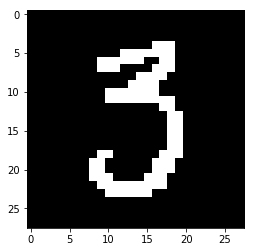

The number is 3


In [55]:
random_select()

testing...
1 / 9 


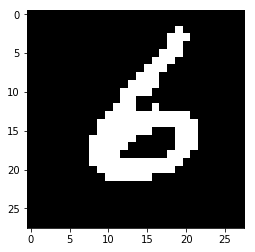

The number is 6
2 / 9 


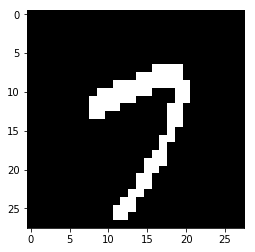

The number is 7
3 / 9 


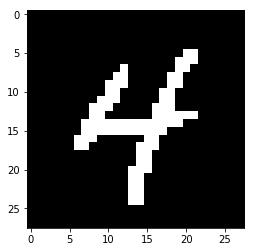

The number is 4
4 / 9 


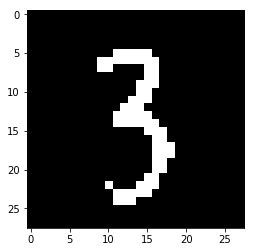

The number is 3
5 / 9 


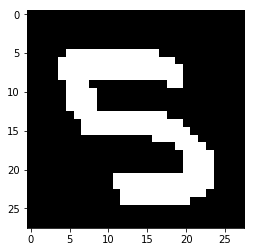

The number is 5
6 / 9 


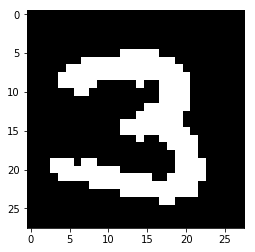

The number is 3
7 / 9 


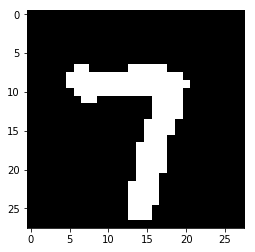

The number is 7
8 / 9 


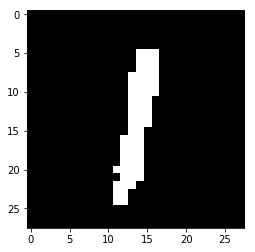

The number is 1
9 / 9 


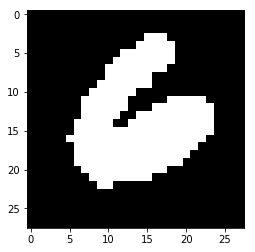

The number is 6

accuracy
1.0


In [56]:
tot = 9
err = 0
print("testing...")
for i in range(9):
    
    print(i+1,"/",9,"\r",)
    best_class = KNN(test_data[i], train_data, train_label, 3)
    
    img = test_data[i].reshape(28,28)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.imshow(img, cmap=plt.cm.gray) 
    plt.show() 
    print("The number is %d" % best_class) 
    
    if(best_class != test_label[i]):
        err = err + 1.0
print("")
print("accuracy")
print(1 - err / tot) 